In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

## Defining all the methods which we will need like
- Getting scaled feature 
- Computing cost
- Drawing straight line by y-intercept and m (Slope)
- Apply gradient descent

In [119]:
def getScaledFeature(feature):
    featureMean = feature.mean()
    featureMax = feature.max()
    featureMin = feature.min()
    featureRange = featureMax - featureMin
    feature = feature.map(lambda item: (item - featureMean)/ featureRange)
    return feature

In [120]:
def computeCost(m, parameters, x, y):
    [yIntercept, slope] = parameters
    hypothesis = yIntercept + np.dot(x, slope)
    loss = hypothesis - y
    cost = np.sum(loss ** 2) / (2 * len(X))
    return cost

In [121]:
class CostClass(object):
    def __init__(self, cost, yIntercept, slope):
        self.cost = cost
        self.yIntercept = yIntercept
        self.slope = slope

In [122]:
def plotLine(slope, yIntercept, X, y):
    abline_values = [slope * i + yIntercept for i in X]
    plt.scatter(X, y)
    plt.plot(X, abline_values, 'black')
    plt.title(slope)
    plt.show()

In [123]:
costThetaList = []

theta0List = []
theta1List = []
gradientList = []

# m denotes the number of examples here, not the number of features
def gradientDescent(x, y, parameters, learning_rate, num_iterations):
    m = len(x)
    theta0Gradient = 0; # initial value
    theta1Gradient = 0; # initial value
    [yIntercept, slope] = parameters
    
    for i in range(0, num_iterations):
        cost = computeCost(m, parameters, x, y)
        [yIntercept, slope] = parameters
        costThetaList.append(CostClass(cost, yIntercept, slope)) # adding history data in set for fetching the minimum later
        plotLine(slope, yIntercept, x, y)
        # Appending value in lists for plotting the graph later-on
        gradientList.append(cost)
        theta0List.append(yIntercept)
        theta1List.append(slope)
        
        print("Iteration %d | Cost: %f | theta %.10f %.8f" % (i, cost, yIntercept, slope))
        hypothesis = yIntercept + np.dot(X, slope)
        loss = hypothesis - y
        
        theta0Gradient = (1/m) * np.sum(loss)
        theta1Gradient = (1/m) * np.sum(np.dot(loss, X))
        yIntercept = yIntercept - (learning_rate * theta0Gradient)
        slope = slope - (learning_rate * theta1Gradient)
        parameters = [yIntercept, slope]
    return [yIntercept, slope]

## Fetch dataset from CSV into dataframe, df

In [124]:
df = pd.read_csv('../houseprices.csv')
df.shape

(96, 17)

In [125]:
df.head()

OrganisationLabel                                    OrganisationURI  \
0      Lincolnshire  http://opendatacommunities.org/id/county-counc...   
1      Lincolnshire  http://opendatacommunities.org/id/county-counc...   
2      Lincolnshire  http://opendatacommunities.org/id/county-counc...   
3      Lincolnshire  http://opendatacommunities.org/id/county-counc...   
4      Lincolnshire  http://opendatacommunities.org/id/county-counc...   

         PublishedDate LatestData         DurationFrom           DurationTo  \
0  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   
1  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   
2  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   
3  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   
4  2018-08-22T00:00:00       True  2018-06-01T00:00:00  2018-06-30T23:59:59   

  ReportingPeriodType    Month     GeoEntityName    GeoCode         GeoName  \
0               Month  2018-06  District Council  E07000136          Boston   
1               Month  2018-06  District Council  E07000137    East Lindsey   
2               Month  2018-06  District Council  E07000138         Lincoln   
3               Month  2018-06  District Council  E07000139  North Kesteven   
4               Month  2018-06  District Council  E07000140   South Holland   

                                              GeoURI  AveragePrice  \
0  http://statistics.data.gov.uk/doc/statistical-...        153458   
1  http://statistics.data.gov.uk/doc/statistical-...        169255   
2  http://statistics.data.gov.uk/doc/statistical-...        147578   
3  http://statistics.data.gov.uk/doc/statistical-...        205763   
4  http://statistics.data.gov.uk/doc/statistical-...        185205   

   AveragePriceDetached  AveragePriceSemiDetached  AveragePriceTerraced  \
0                210267                    131631                105835   
1                208535                    144062                114716   
2                235597                    159052                122782   
3                249046                    169806                141247   
4                228877                    157058                128691   

   AveragePriceFlatOrMaisonette  
0                         82069  
1                         86208  
2                        100896  
3                        101705  
4                         86009

In [126]:
df.describe()

AveragePrice  AveragePriceDetached  AveragePriceSemiDetached  \
count      96.000000             96.000000                 96.000000   
mean   174695.531250         232415.989583             153918.614583   
std     20657.431458          26043.738795              17109.067049   
min    142606.000000         197723.000000             122934.000000   
25%    160337.750000         213405.500000             142469.750000   
50%    173248.000000         229160.000000             154733.000000   
75%    189221.500000         237361.750000             160223.500000   
max    213382.000000         300043.000000             192724.000000   

       AveragePriceTerraced  AveragePriceFlatOrMaisonette  
count             96.000000                     96.000000  
mean          124320.781250                  94400.239583  
std            14282.285741                   9058.920326  
min            98900.000000                  77133.000000  
25%           114507.750000                  86614.750000  
50%           124887.500000                  96237.000000  
75%           130628.750000                 100383.000000  
max           155729.000000                 110953.000000

### Only taking numerical continous values for dataset to consider for Linear Regression

In [127]:
dfToConsider = df.iloc[:,13:17]
dfToConsider.shape

(96, 4)

In [128]:
[m, n] = dfToConsider.shape
dfToConsider.head()

AveragePriceDetached  AveragePriceSemiDetached  AveragePriceTerraced  \
0                210267                    131631                105835   
1                208535                    144062                114716   
2                235597                    159052                122782   
3                249046                    169806                141247   
4                228877                    157058                128691   

   AveragePriceFlatOrMaisonette  
0                         82069  
1                         86208  
2                        100896  
3                        101705  
4                         86009

In [129]:
train = dfToConsider.iloc[:(m-16), :]
test = dfToConsider.iloc[(m-15):, :]

In [130]:
train.shape

(80, 4)

In [131]:
# Get X and y
# train = train[ train['AveragePriceDetached'] < 280000]
X = train['AveragePriceDetached']
y = train['AveragePriceTerraced']
X = getScaledFeature(X)
y = getScaledFeature(y)
xTest = test['AveragePriceDetached']
yTest = test['AveragePriceTerraced']
xTest= getScaledFeature(xTest)
yTest = getScaledFeature(yTest)
m = len(X)

#### Plot X vs y

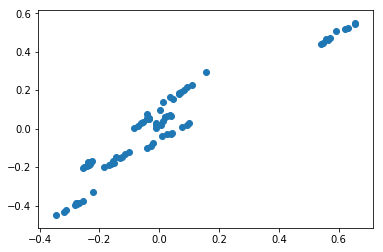

In [132]:
plt.scatter(X, y)

In [133]:
# Set hypothesis paramters

# y = mx + b (slope formula) ~ theta1.x + theta0
slope = 0
yIntercept = 0
parameters = [yIntercept, slope] # inital slope and y-itercept for hypothesis, [c, m]

Starting gradient descent at b = 0, m = 0.560000, error = 0.009957


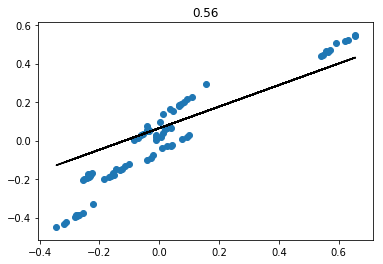

In [134]:
yIntercept = 0.06459795090849802
slope = 0.56
parameters = [yIntercept, slope]
print("Starting gradient descent at b = %d, m = %f, error = %f" % (yIntercept, slope, computeCost(m, parameters, X, y)))
plotLine(slope, yIntercept, X, y)

In [135]:
# Set hyper paramters
learning_rate = 0.1
num_iterations = 1000

Running...


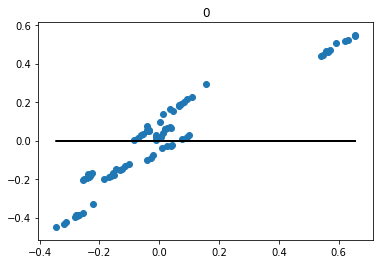

Iteration 0 | Cost: 0.031994 | theta 0.0000000000 0.00000000


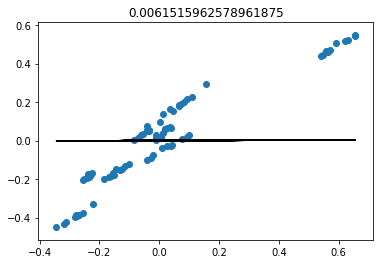

Iteration 1 | Cost: 0.031617 | theta -0.0000000000 0.00615160


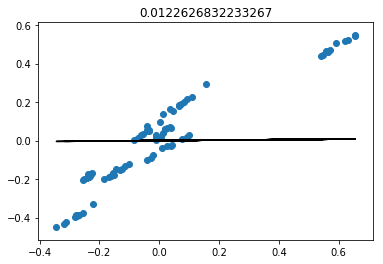

Iteration 2 | Cost: 0.031245 | theta -0.0000000000 0.01226268


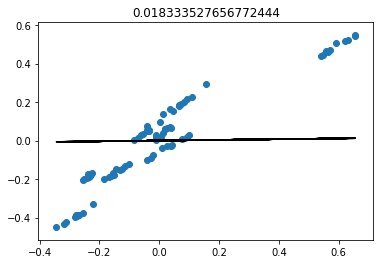

Iteration 3 | Cost: 0.030877 | theta -0.0000000000 0.01833353


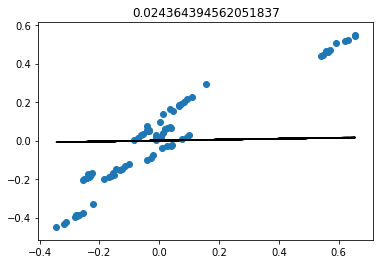

Iteration 4 | Cost: 0.030515 | theta -0.0000000000 0.02436439


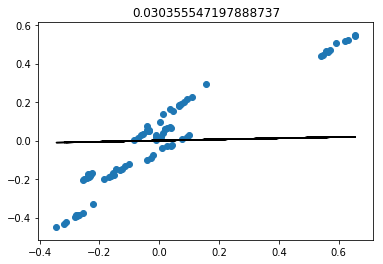

Iteration 5 | Cost: 0.030157 | theta -0.0000000000 0.03035555


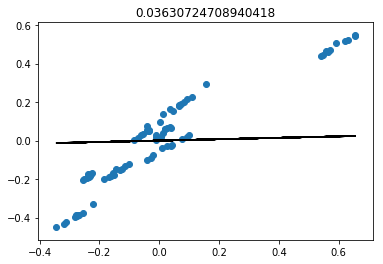

Iteration 6 | Cost: 0.029804 | theta -0.0000000000 0.03630725


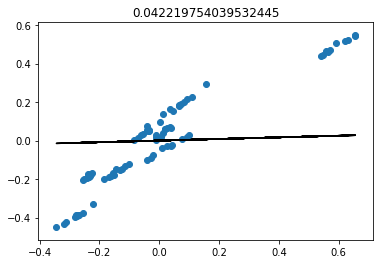

Iteration 7 | Cost: 0.029456 | theta -0.0000000000 0.04221975


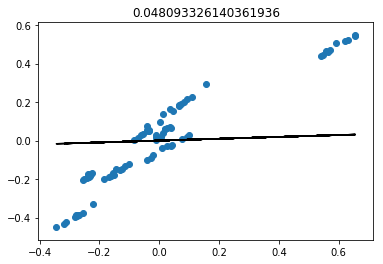

Iteration 8 | Cost: 0.029112 | theta -0.0000000000 0.04809333


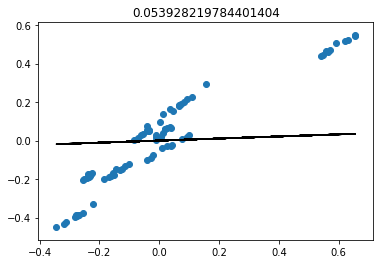

Iteration 9 | Cost: 0.028772 | theta -0.0000000000 0.05392822


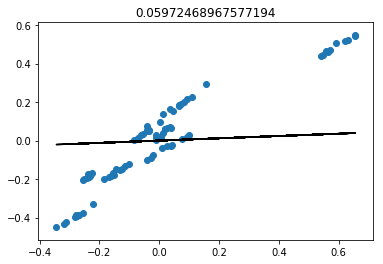

Iteration 10 | Cost: 0.028438 | theta -0.0000000000 0.05972469


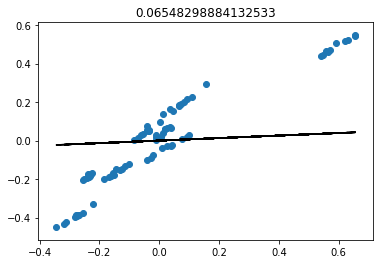

Iteration 11 | Cost: 0.028107 | theta -0.0000000000 0.06548299


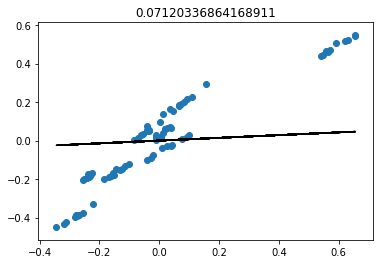

Iteration 12 | Cost: 0.027781 | theta -0.0000000000 0.07120337


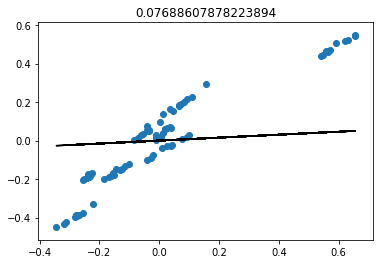

Iteration 13 | Cost: 0.027459 | theta -0.0000000000 0.07688608


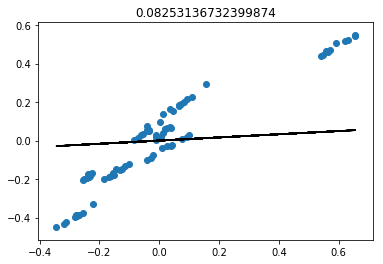

Iteration 14 | Cost: 0.027141 | theta -0.0000000000 0.08253137


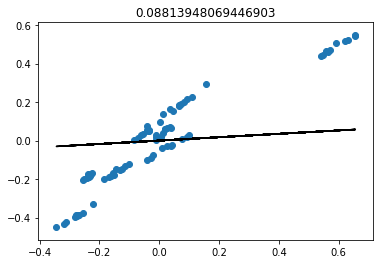

Iteration 15 | Cost: 0.026828 | theta -0.0000000000 0.08813948


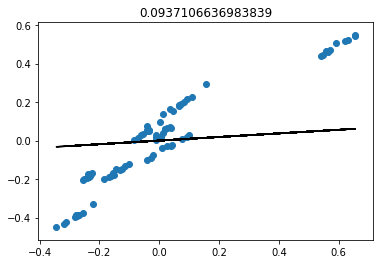

Iteration 16 | Cost: 0.026519 | theta -0.0000000000 0.09371066


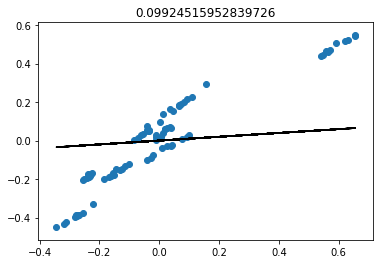

Iteration 17 | Cost: 0.026213 | theta -0.0000000000 0.09924516


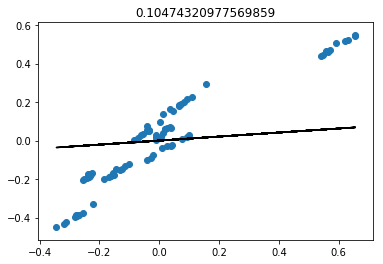

Iteration 18 | Cost: 0.025912 | theta -0.0000000000 0.10474321


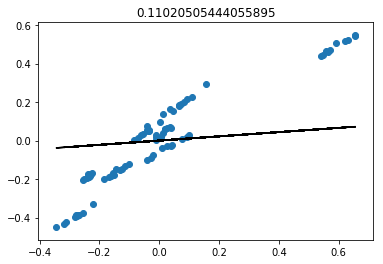

Iteration 19 | Cost: 0.025615 | theta -0.0000000000 0.11020505


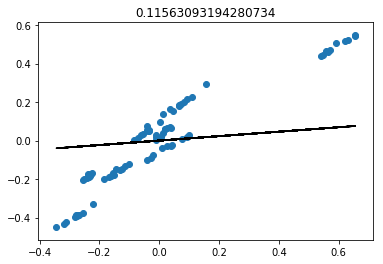

Iteration 20 | Cost: 0.025321 | theta -0.0000000000 0.11563093


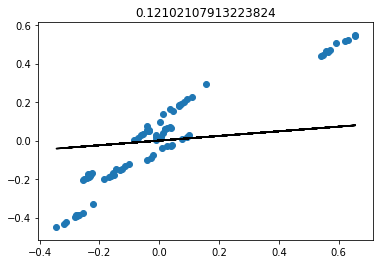

Iteration 21 | Cost: 0.025032 | theta -0.0000000000 0.12102108


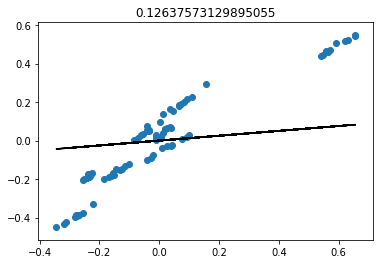

Iteration 22 | Cost: 0.024746 | theta -0.0000000000 0.12637573


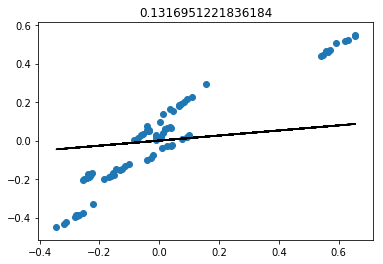

Iteration 23 | Cost: 0.024464 | theta -0.0000000000 0.13169512


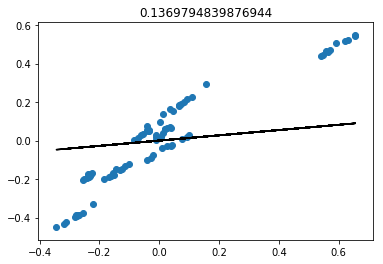

Iteration 24 | Cost: 0.024186 | theta -0.0000000000 0.13697948


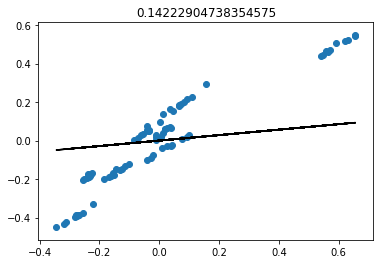

Iteration 25 | Cost: 0.023911 | theta -0.0000000000 0.14222905


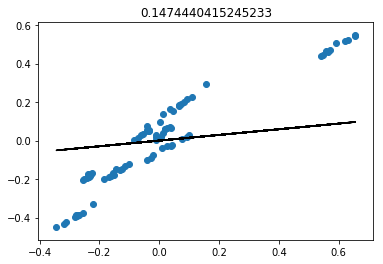

Iteration 26 | Cost: 0.023640 | theta -0.0000000000 0.14744404


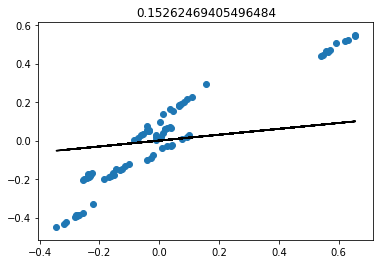

Iteration 27 | Cost: 0.023372 | theta -0.0000000000 0.15262469


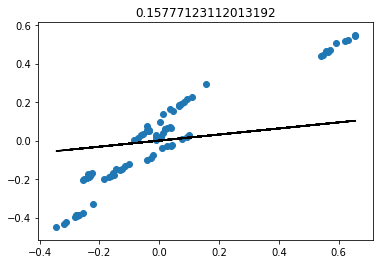

Iteration 28 | Cost: 0.023108 | theta -0.0000000000 0.15777123


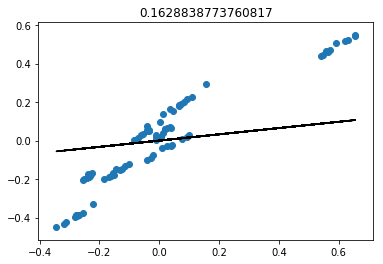

Iteration 29 | Cost: 0.022848 | theta -0.0000000000 0.16288388


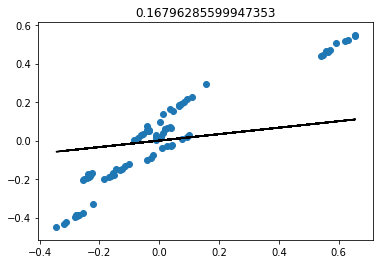

Iteration 30 | Cost: 0.022591 | theta -0.0000000000 0.16796286


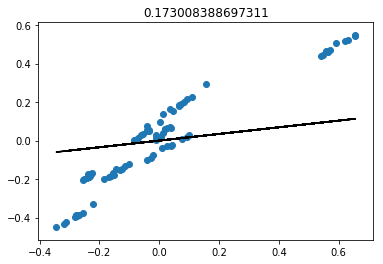

Iteration 31 | Cost: 0.022337 | theta -0.0000000000 0.17300839


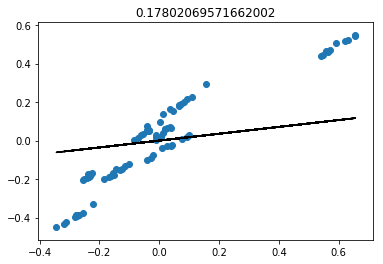

Iteration 32 | Cost: 0.022086 | theta -0.0000000000 0.17802070


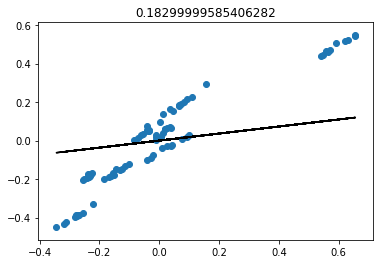

Iteration 33 | Cost: 0.021839 | theta -0.0000000000 0.18300000


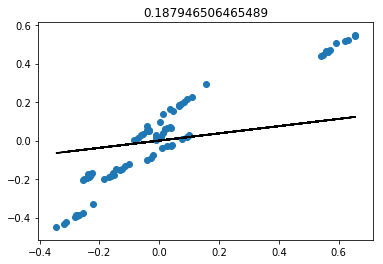

Iteration 34 | Cost: 0.021595 | theta -0.0000000000 0.18794651


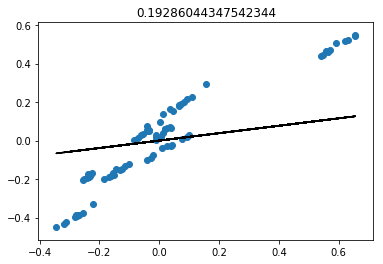

Iteration 35 | Cost: 0.021355 | theta -0.0000000000 0.19286044


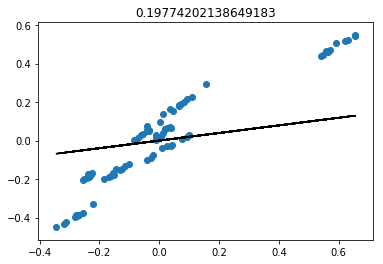

Iteration 36 | Cost: 0.021117 | theta -0.0000000000 0.19774202


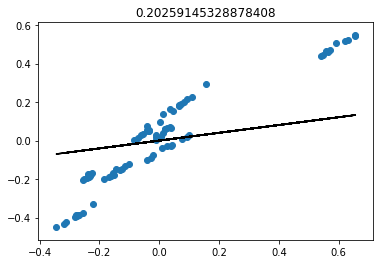

Iteration 37 | Cost: 0.020883 | theta -0.0000000000 0.20259145


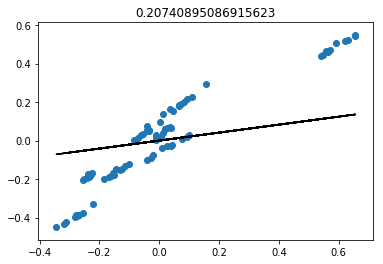

Iteration 38 | Cost: 0.020652 | theta -0.0000000000 0.20740895


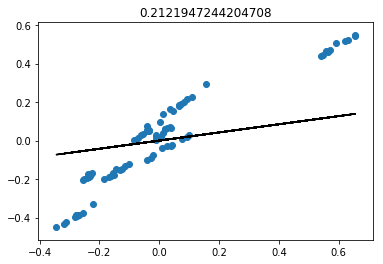

Iteration 39 | Cost: 0.020423 | theta -0.0000000000 0.21219472


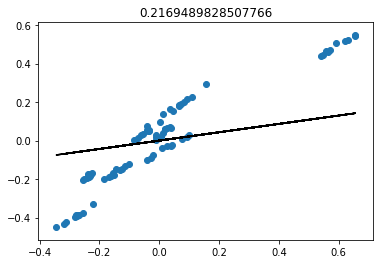

Iteration 40 | Cost: 0.020198 | theta -0.0000000000 0.21694898


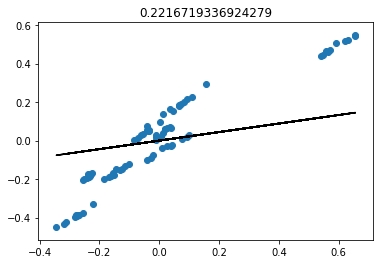

Iteration 41 | Cost: 0.019976 | theta -0.0000000000 0.22167193


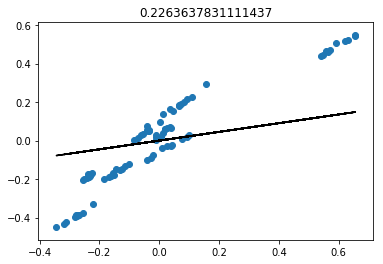

Iteration 42 | Cost: 0.019756 | theta -0.0000000000 0.22636378


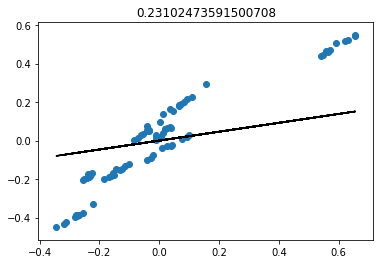

Iteration 43 | Cost: 0.019540 | theta -0.0000000000 0.23102474


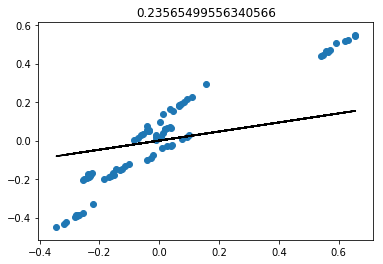

Iteration 44 | Cost: 0.019326 | theta -0.0000000000 0.23565500


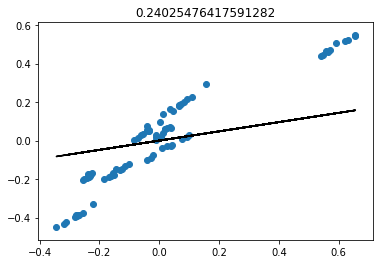

Iteration 45 | Cost: 0.019115 | theta -0.0000000000 0.24025476


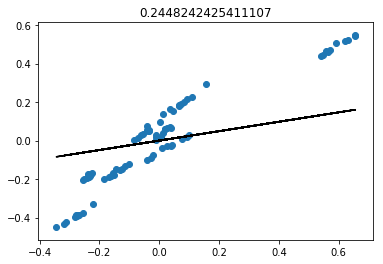

Iteration 46 | Cost: 0.018907 | theta -0.0000000000 0.24482424


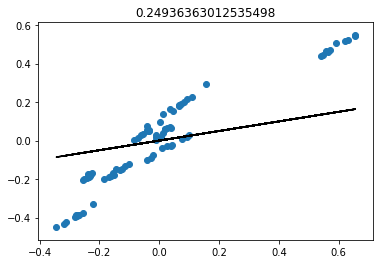

Iteration 47 | Cost: 0.018702 | theta -0.0000000000 0.24936363


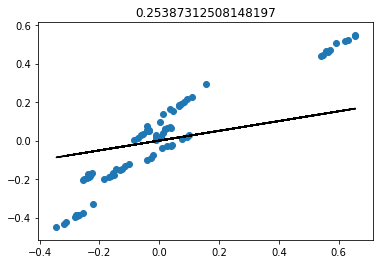

Iteration 48 | Cost: 0.018499 | theta -0.0000000000 0.25387313


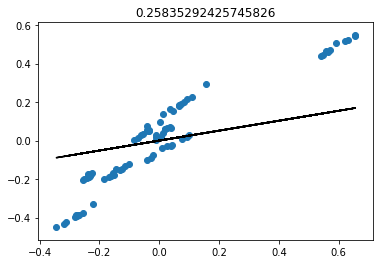

Iteration 49 | Cost: 0.018299 | theta -0.0000000000 0.25835292


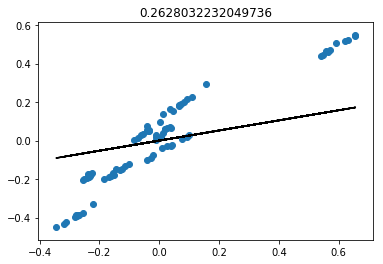

Iteration 50 | Cost: 0.018102 | theta -0.0000000000 0.26280322


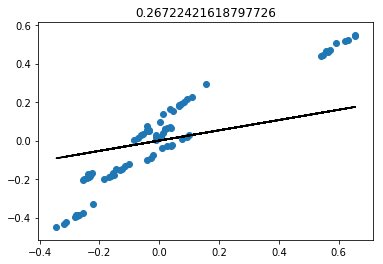

Iteration 51 | Cost: 0.017907 | theta -0.0000000000 0.26722422


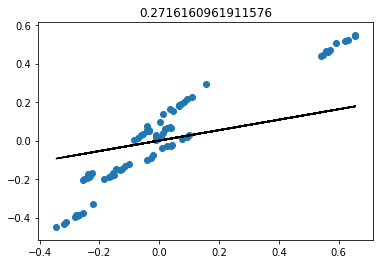

Iteration 52 | Cost: 0.017715 | theta -0.0000000000 0.27161610


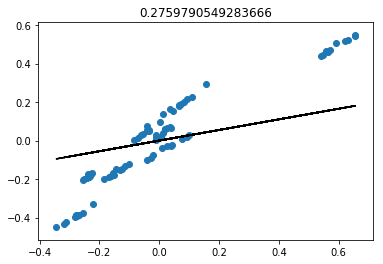

Iteration 53 | Cost: 0.017525 | theta -0.0000000000 0.27597905


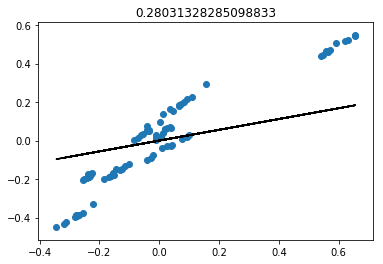

Iteration 54 | Cost: 0.017338 | theta -0.0000000000 0.28031328


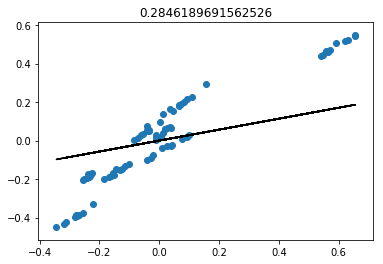

Iteration 55 | Cost: 0.017153 | theta -0.0000000000 0.28461897


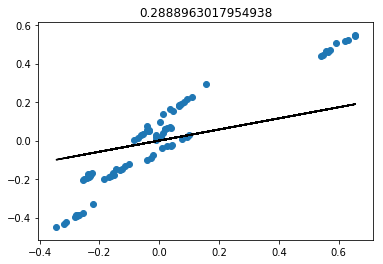

Iteration 56 | Cost: 0.016970 | theta -0.0000000000 0.28889630


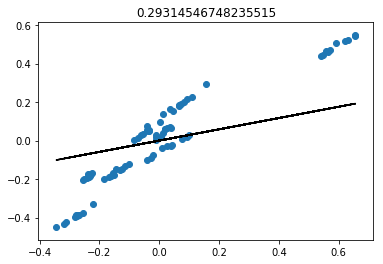

Iteration 57 | Cost: 0.016790 | theta -0.0000000000 0.29314547


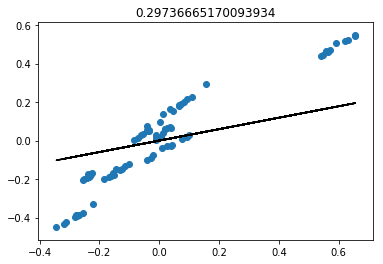

Iteration 58 | Cost: 0.016613 | theta -0.0000000000 0.29736665


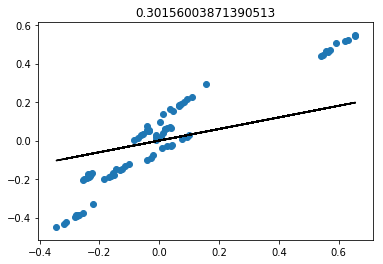

Iteration 59 | Cost: 0.016438 | theta -0.0000000000 0.30156004


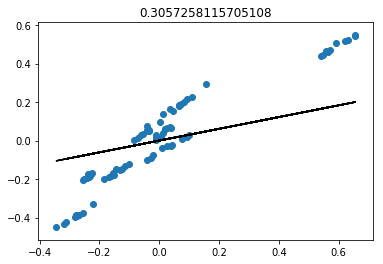

Iteration 60 | Cost: 0.016265 | theta -0.0000000000 0.30572581


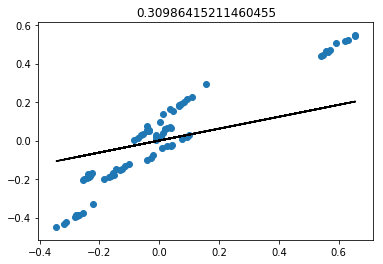

Iteration 61 | Cost: 0.016094 | theta -0.0000000000 0.30986415


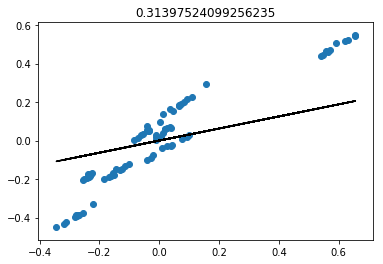

Iteration 62 | Cost: 0.015925 | theta -0.0000000000 0.31397524


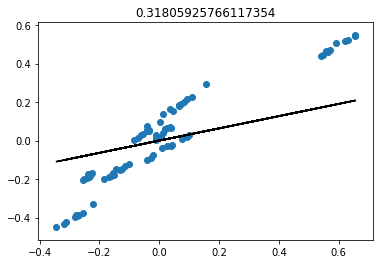

Iteration 63 | Cost: 0.015759 | theta -0.0000000000 0.31805926


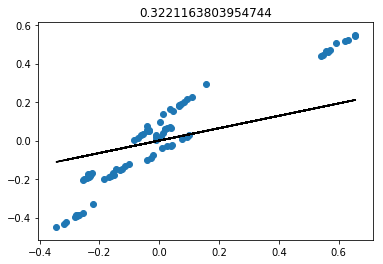

Iteration 64 | Cost: 0.015595 | theta -0.0000000000 0.32211638


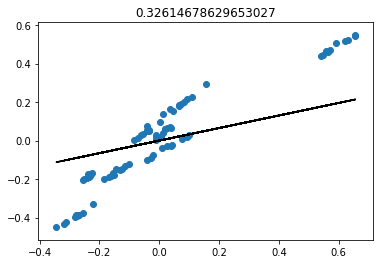

Iteration 65 | Cost: 0.015433 | theta -0.0000000000 0.32614679


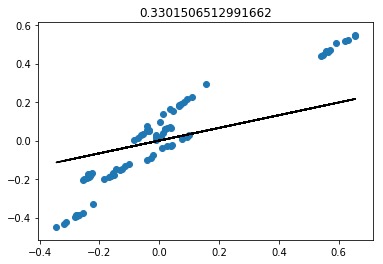

Iteration 66 | Cost: 0.015273 | theta -0.0000000000 0.33015065


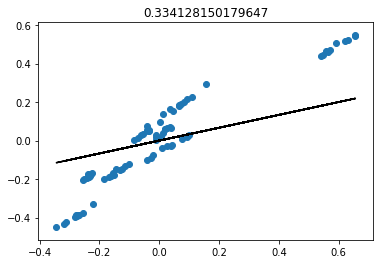

Iteration 67 | Cost: 0.015116 | theta -0.0000000000 0.33412815


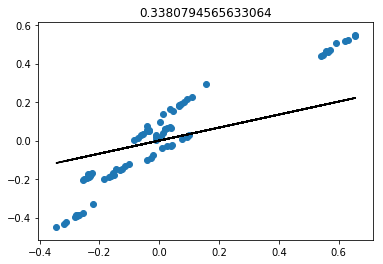

Iteration 68 | Cost: 0.014960 | theta -0.0000000000 0.33807946


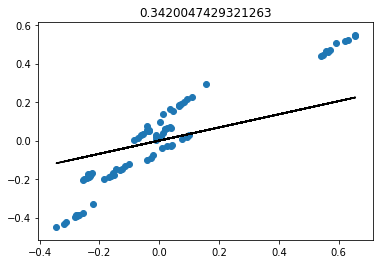

Iteration 69 | Cost: 0.014807 | theta -0.0000000000 0.34200474


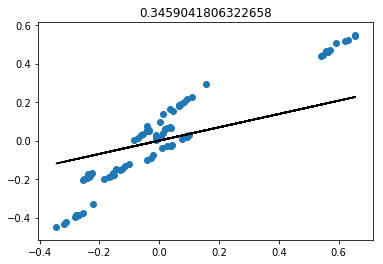

Iteration 70 | Cost: 0.014655 | theta -0.0000000000 0.34590418


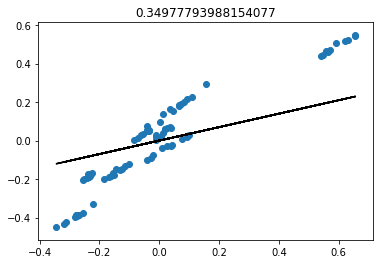

Iteration 71 | Cost: 0.014506 | theta -0.0000000000 0.34977794


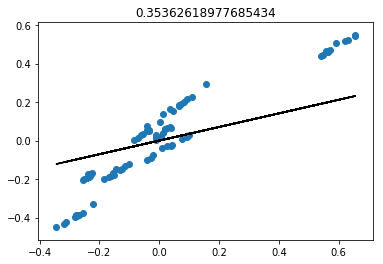

Iteration 72 | Cost: 0.014358 | theta -0.0000000000 0.35362619


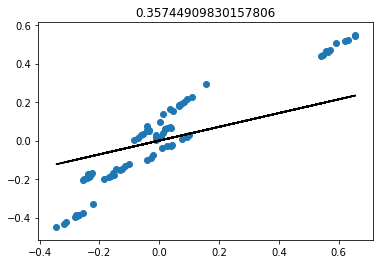

Iteration 73 | Cost: 0.014212 | theta -0.0000000000 0.35744910


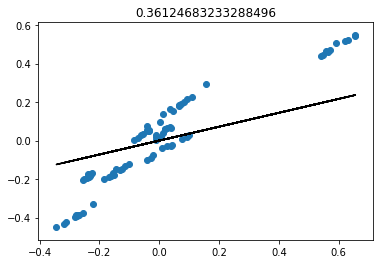

Iteration 74 | Cost: 0.014068 | theta -0.0000000000 0.36124683


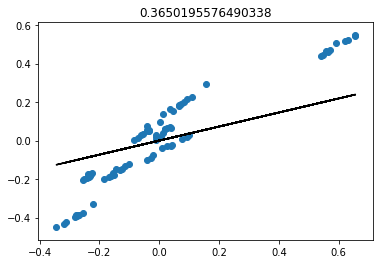

Iteration 75 | Cost: 0.013927 | theta -0.0000000000 0.36501956


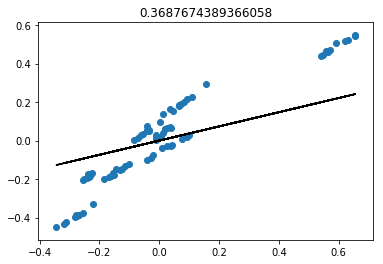

Iteration 76 | Cost: 0.013787 | theta -0.0000000000 0.36876744


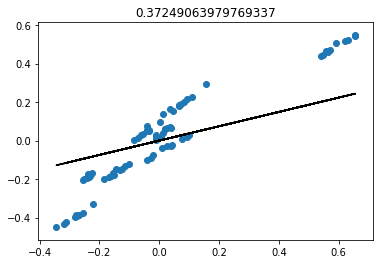

Iteration 77 | Cost: 0.013648 | theta -0.0000000000 0.37249064


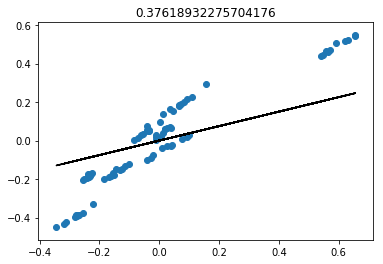

Iteration 78 | Cost: 0.013512 | theta -0.0000000000 0.37618932


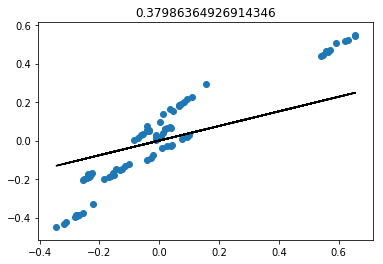

Iteration 79 | Cost: 0.013378 | theta -0.0000000000 0.37986365


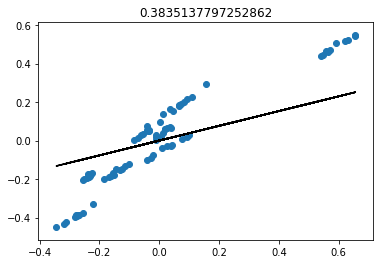

Iteration 80 | Cost: 0.013245 | theta -0.0000000000 0.38351378


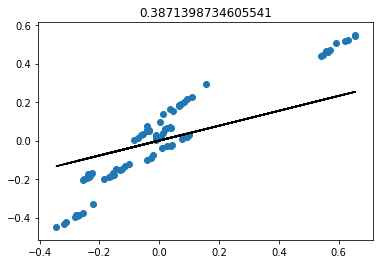

Iteration 81 | Cost: 0.013114 | theta -0.0000000000 0.38713987


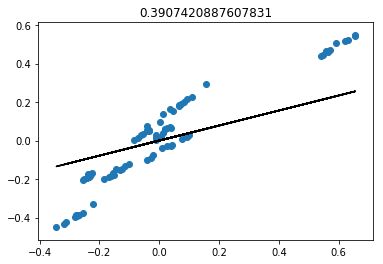

Iteration 82 | Cost: 0.012984 | theta -0.0000000000 0.39074209


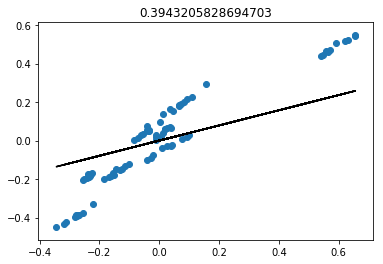

Iteration 83 | Cost: 0.012857 | theta -0.0000000000 0.39432058


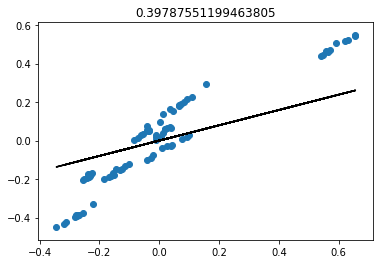

Iteration 84 | Cost: 0.012731 | theta -0.0000000000 0.39787551


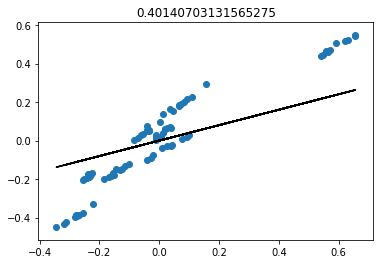

Iteration 85 | Cost: 0.012606 | theta -0.0000000000 0.40140703


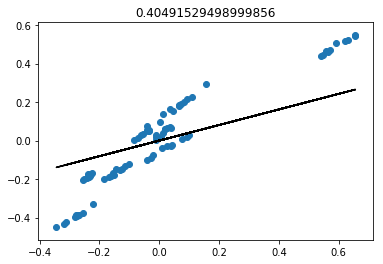

Iteration 86 | Cost: 0.012484 | theta -0.0000000000 0.40491529


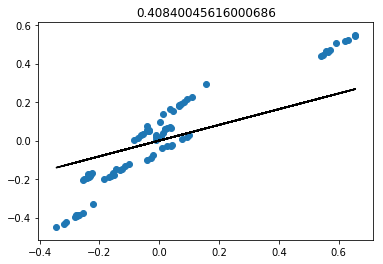

Iteration 87 | Cost: 0.012363 | theta -0.0000000000 0.40840046


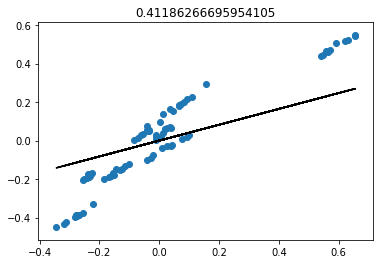

Iteration 88 | Cost: 0.012243 | theta -0.0000000000 0.41186267


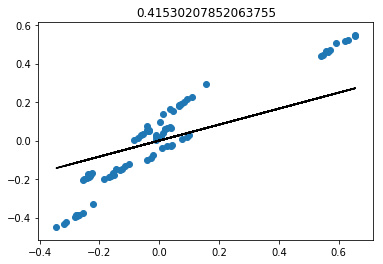

Iteration 89 | Cost: 0.012125 | theta -0.0000000000 0.41530208


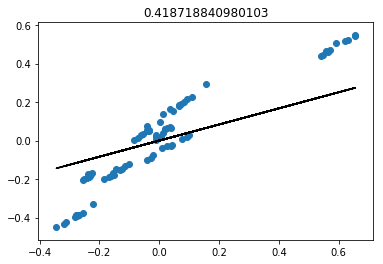

Iteration 90 | Cost: 0.012009 | theta -0.0000000000 0.41871884


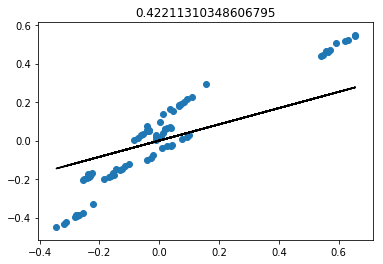

Iteration 91 | Cost: 0.011894 | theta -0.0000000000 0.42211310


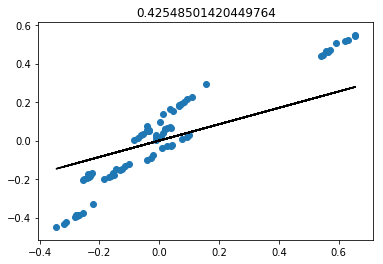

Iteration 92 | Cost: 0.011781 | theta -0.0000000000 0.42548501


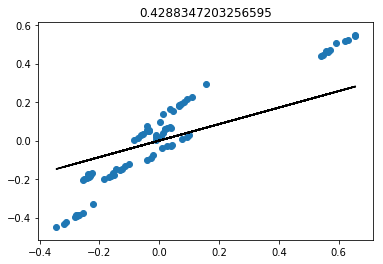

Iteration 93 | Cost: 0.011669 | theta -0.0000000000 0.42883472


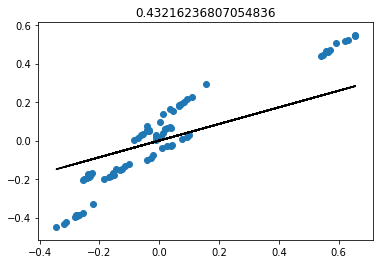

Iteration 94 | Cost: 0.011559 | theta -0.0000000000 0.43216237


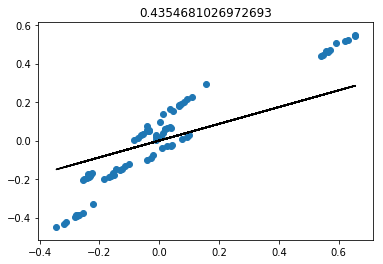

Iteration 95 | Cost: 0.011450 | theta -0.0000000000 0.43546810


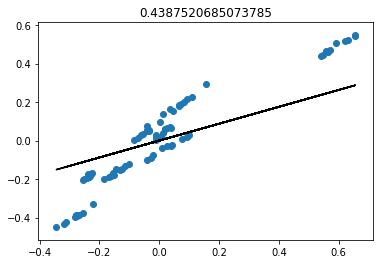

Iteration 96 | Cost: 0.011342 | theta -0.0000000000 0.43875207


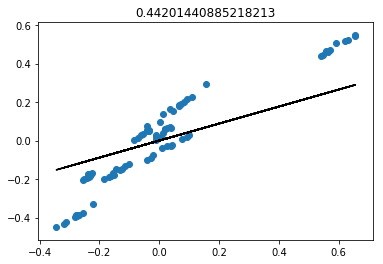

Iteration 97 | Cost: 0.011236 | theta -0.0000000000 0.44201441


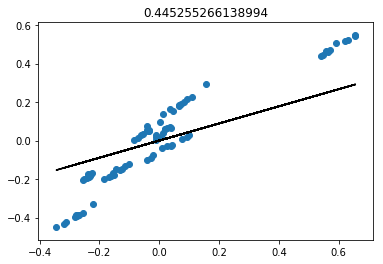

Iteration 98 | Cost: 0.011131 | theta -0.0000000000 0.44525527


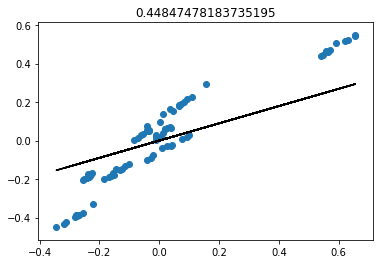

Iteration 99 | Cost: 0.011028 | theta -0.0000000000 0.44847478


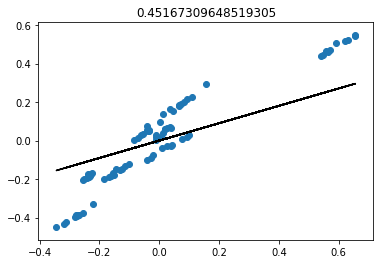

Iteration 100 | Cost: 0.010926 | theta -0.0000000000 0.45167310


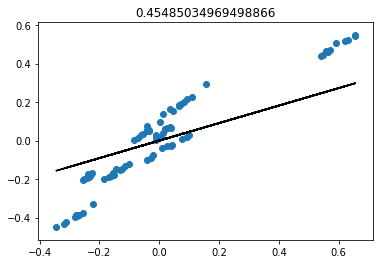

Iteration 101 | Cost: 0.010826 | theta -0.0000000000 0.45485035


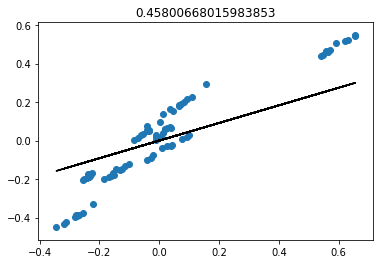

Iteration 102 | Cost: 0.010726 | theta -0.0000000000 0.45800668


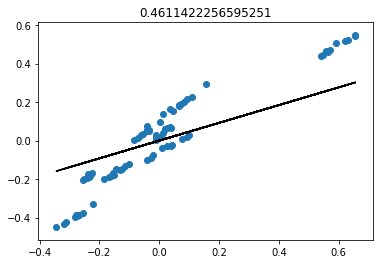

Iteration 103 | Cost: 0.010628 | theta -0.0000000000 0.46114223


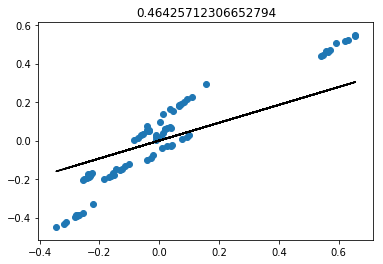

Iteration 104 | Cost: 0.010532 | theta -0.0000000000 0.46425712


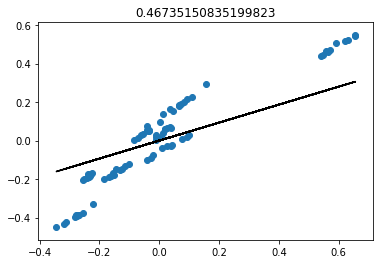

Iteration 105 | Cost: 0.010436 | theta -0.0000000000 0.46735151


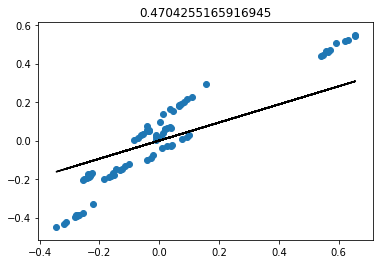

Iteration 106 | Cost: 0.010342 | theta -0.0000000000 0.47042552


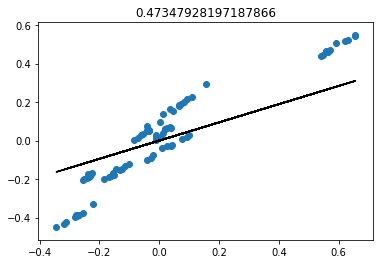

Iteration 107 | Cost: 0.010249 | theta -0.0000000000 0.47347928


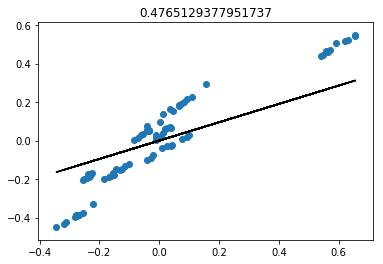

Iteration 108 | Cost: 0.010157 | theta -0.0000000000 0.47651294


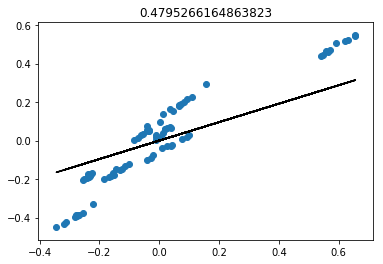

Iteration 109 | Cost: 0.010067 | theta -0.0000000000 0.47952662


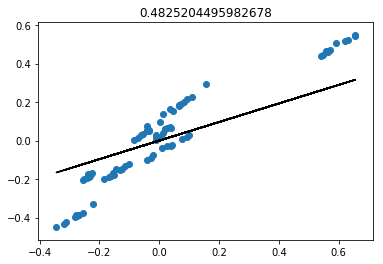

Iteration 110 | Cost: 0.009977 | theta -0.0000000000 0.48252045


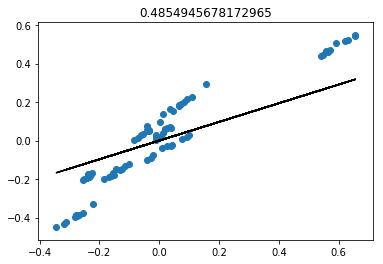

Iteration 111 | Cost: 0.009889 | theta -0.0000000000 0.48549457


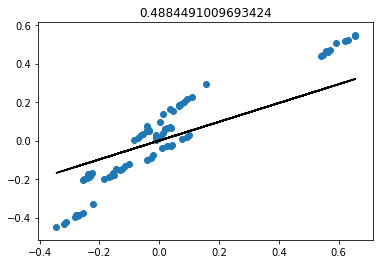

Iteration 112 | Cost: 0.009802 | theta -0.0000000000 0.48844910


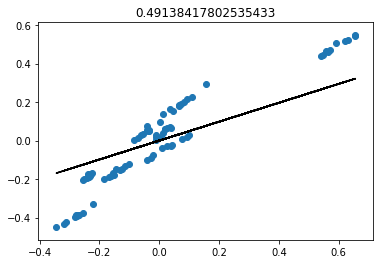

Iteration 113 | Cost: 0.009716 | theta -0.0000000000 0.49138418


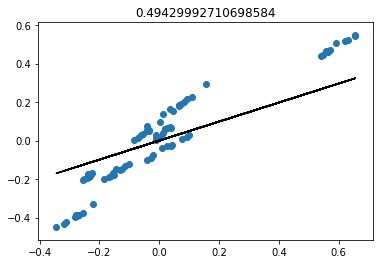

Iteration 114 | Cost: 0.009632 | theta -0.0000000000 0.49429993


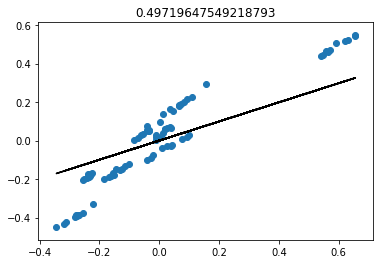

Iteration 115 | Cost: 0.009548 | theta -0.0000000000 0.49719648


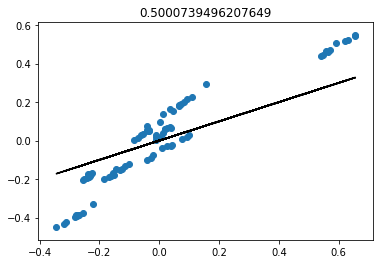

Iteration 116 | Cost: 0.009465 | theta -0.0000000000 0.50007395


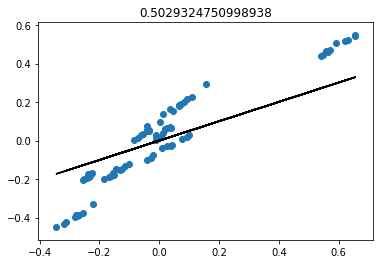

Iteration 117 | Cost: 0.009384 | theta -0.0000000000 0.50293248


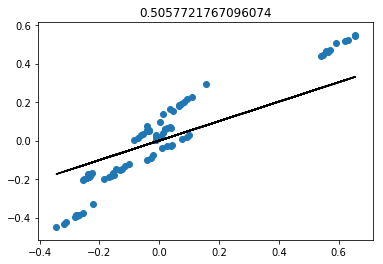

Iteration 118 | Cost: 0.009304 | theta -0.0000000000 0.50577218


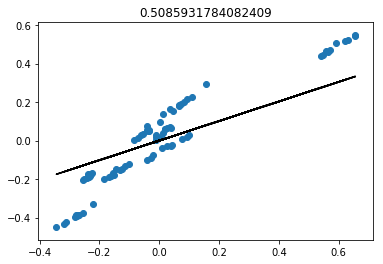

Iteration 119 | Cost: 0.009224 | theta -0.0000000000 0.50859318


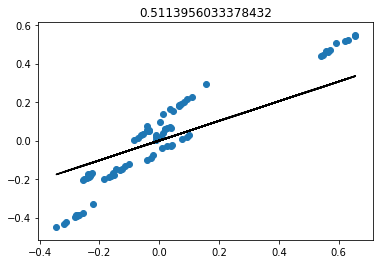

Iteration 120 | Cost: 0.009146 | theta -0.0000000000 0.51139560


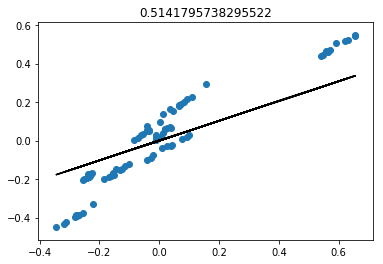

Iteration 121 | Cost: 0.009069 | theta -0.0000000000 0.51417957


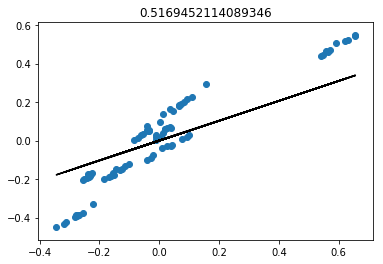

Iteration 122 | Cost: 0.008993 | theta -0.0000000000 0.51694521


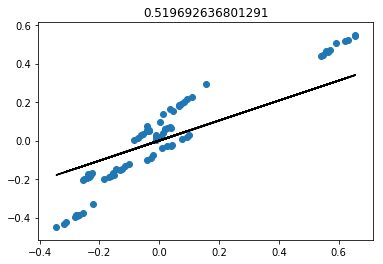

Iteration 123 | Cost: 0.008917 | theta -0.0000000000 0.51969264


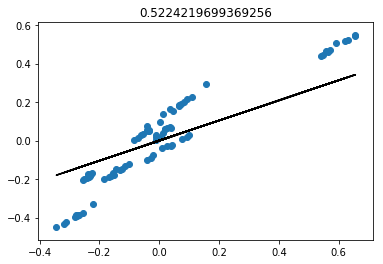

Iteration 124 | Cost: 0.008843 | theta -0.0000000000 0.52242197


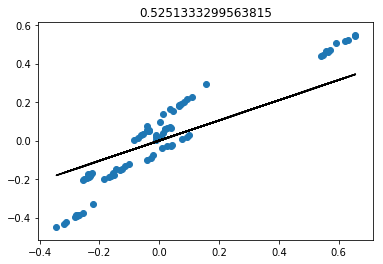

Iteration 125 | Cost: 0.008770 | theta -0.0000000000 0.52513333


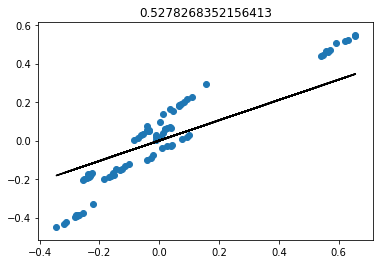

Iteration 126 | Cost: 0.008698 | theta -0.0000000000 0.52782684


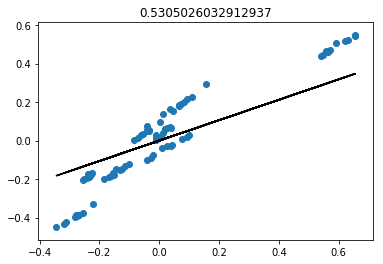

Iteration 127 | Cost: 0.008626 | theta -0.0000000000 0.53050260


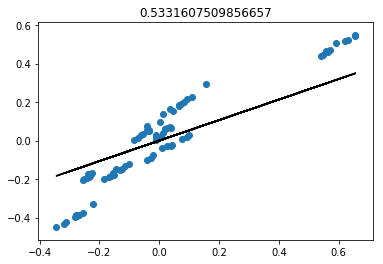

Iteration 128 | Cost: 0.008556 | theta -0.0000000000 0.53316075


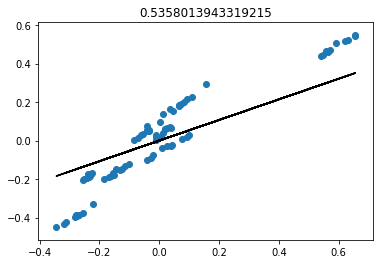

Iteration 129 | Cost: 0.008486 | theta -0.0000000000 0.53580139


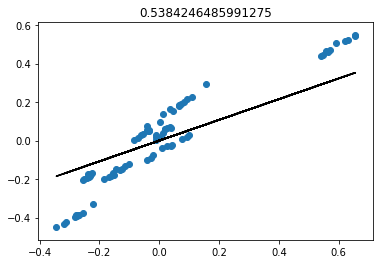

Iteration 130 | Cost: 0.008418 | theta -0.0000000000 0.53842465


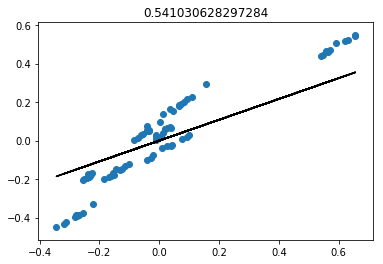

Iteration 131 | Cost: 0.008350 | theta -0.0000000000 0.54103063


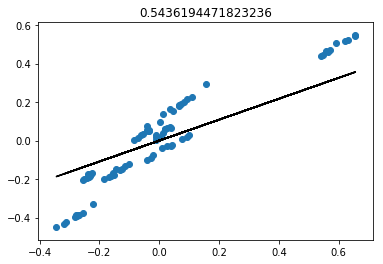

Iteration 132 | Cost: 0.008283 | theta -0.0000000000 0.54361945


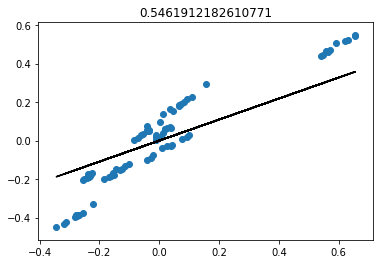

Iteration 133 | Cost: 0.008217 | theta -0.0000000000 0.54619122


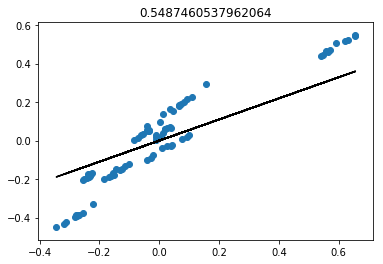

Iteration 134 | Cost: 0.008152 | theta -0.0000000000 0.54874605


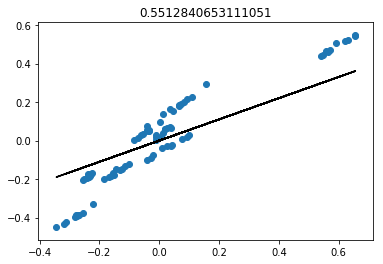

Iteration 135 | Cost: 0.008088 | theta -0.0000000000 0.55128407


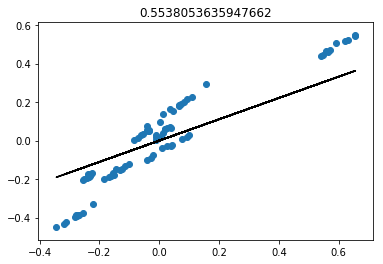

Iteration 136 | Cost: 0.008025 | theta -0.0000000000 0.55380536


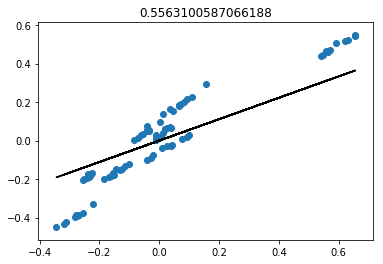

Iteration 137 | Cost: 0.007962 | theta -0.0000000000 0.55631006


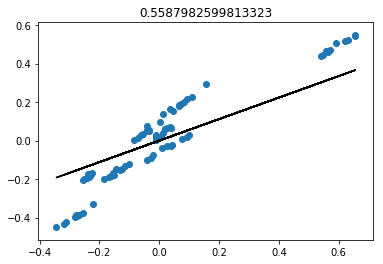

Iteration 138 | Cost: 0.007900 | theta -0.0000000000 0.55879826


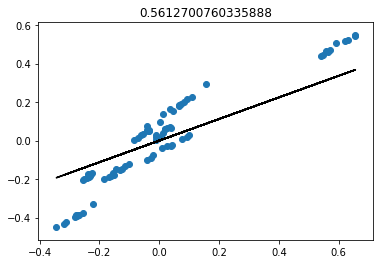

Iteration 139 | Cost: 0.007839 | theta -0.0000000000 0.56127008


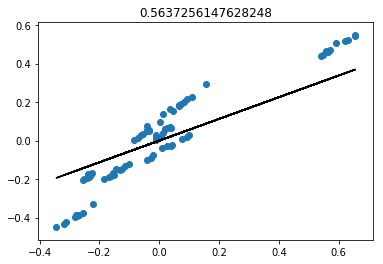

Iteration 140 | Cost: 0.007779 | theta -0.0000000000 0.56372561


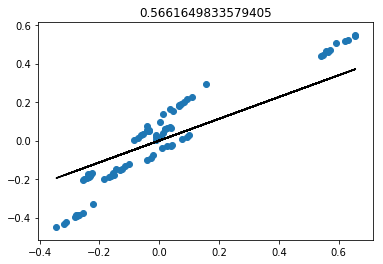

Iteration 141 | Cost: 0.007720 | theta -0.0000000000 0.56616498


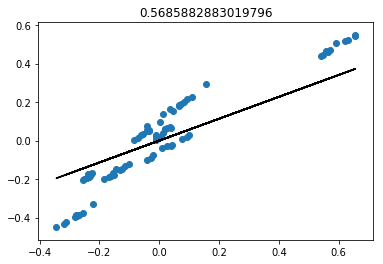

Iteration 142 | Cost: 0.007662 | theta -0.0000000000 0.56858829


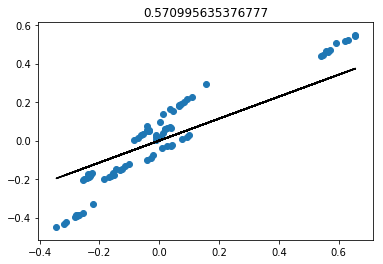

Iteration 143 | Cost: 0.007604 | theta -0.0000000000 0.57099564


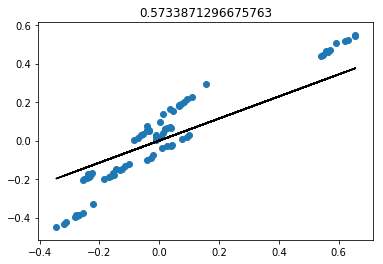

Iteration 144 | Cost: 0.007547 | theta -0.0000000000 0.57338713


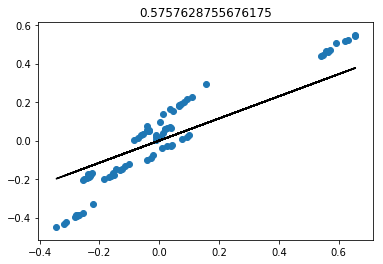

Iteration 145 | Cost: 0.007491 | theta -0.0000000000 0.57576288


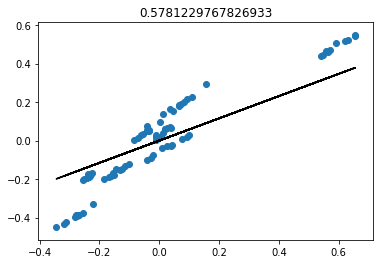

Iteration 146 | Cost: 0.007435 | theta -0.0000000000 0.57812298


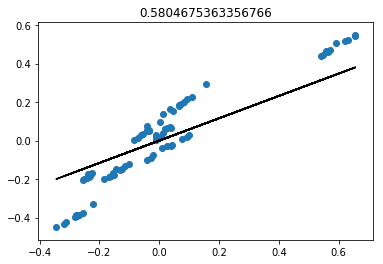

Iteration 147 | Cost: 0.007380 | theta -0.0000000000 0.58046754


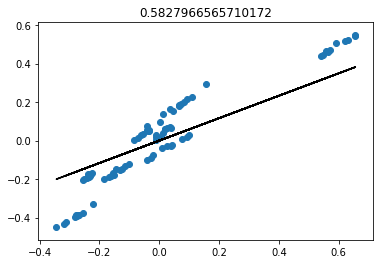

Iteration 148 | Cost: 0.007326 | theta -0.0000000000 0.58279666


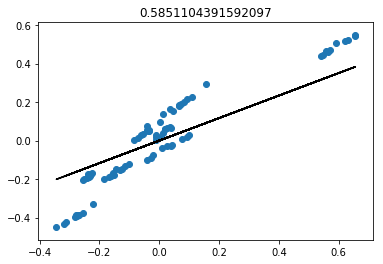

Iteration 149 | Cost: 0.007273 | theta -0.0000000000 0.58511044


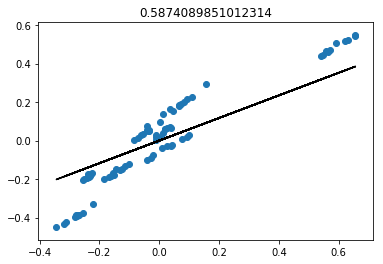

Iteration 150 | Cost: 0.007220 | theta -0.0000000000 0.58740899


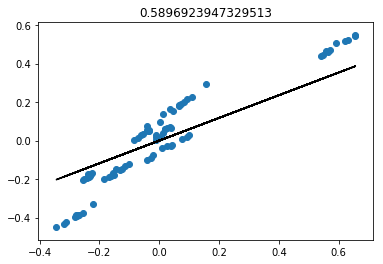

Iteration 151 | Cost: 0.007168 | theta -0.0000000000 0.58969239


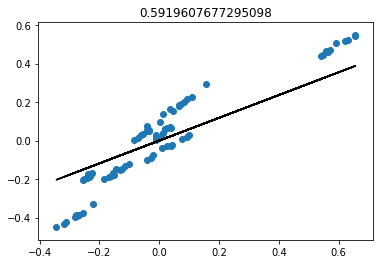

Iteration 152 | Cost: 0.007117 | theta -0.0000000000 0.59196077


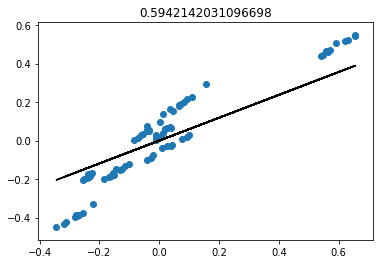

Iteration 153 | Cost: 0.007066 | theta -0.0000000000 0.59421420


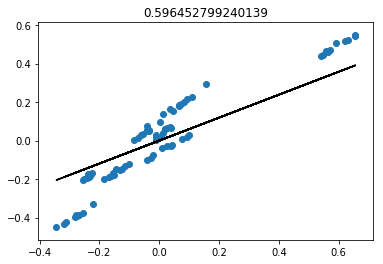

Iteration 154 | Cost: 0.007016 | theta -0.0000000000 0.59645280


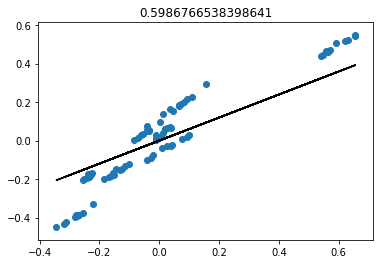

Iteration 155 | Cost: 0.006967 | theta -0.0000000000 0.59867665


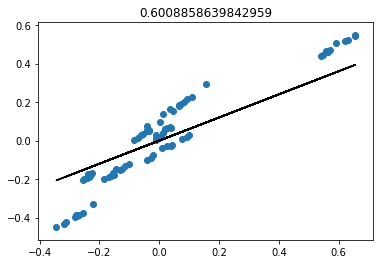

Iteration 156 | Cost: 0.006918 | theta -0.0000000000 0.60088586


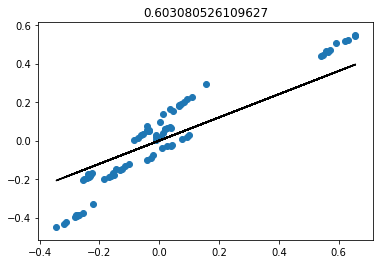

Iteration 157 | Cost: 0.006870 | theta -0.0000000000 0.60308053


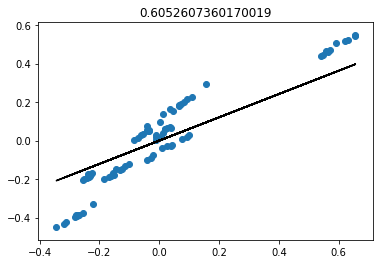

Iteration 158 | Cost: 0.006823 | theta -0.0000000000 0.60526074


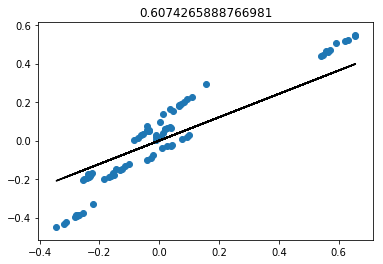

Iteration 159 | Cost: 0.006776 | theta -0.0000000000 0.60742659


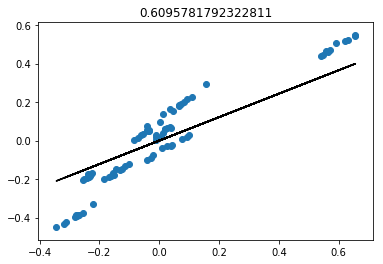

Iteration 160 | Cost: 0.006730 | theta -0.0000000000 0.60957818


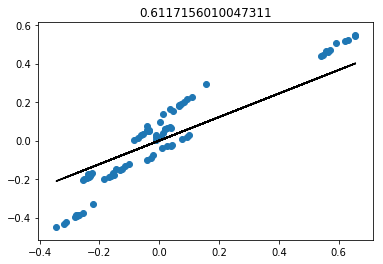

Iteration 161 | Cost: 0.006685 | theta -0.0000000000 0.61171560


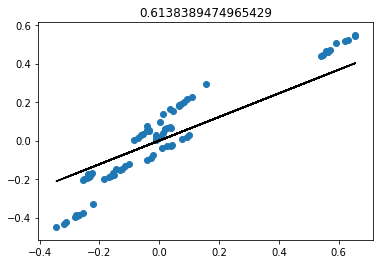

Iteration 162 | Cost: 0.006640 | theta -0.0000000000 0.61383895


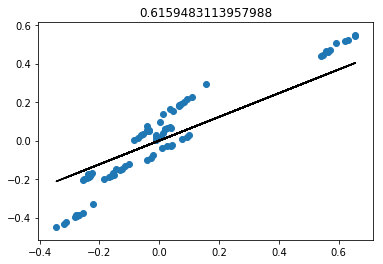

Iteration 163 | Cost: 0.006595 | theta -0.0000000000 0.61594831


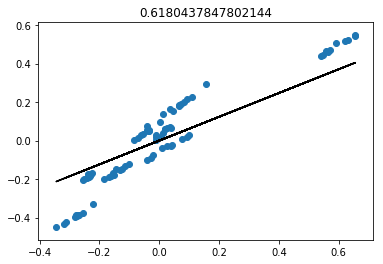

Iteration 164 | Cost: 0.006552 | theta -0.0000000000 0.61804378


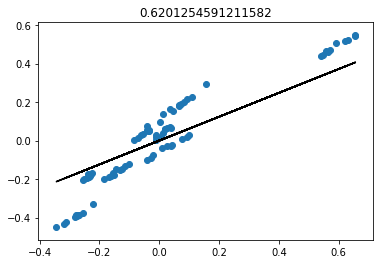

Iteration 165 | Cost: 0.006508 | theta -0.0000000000 0.62012546


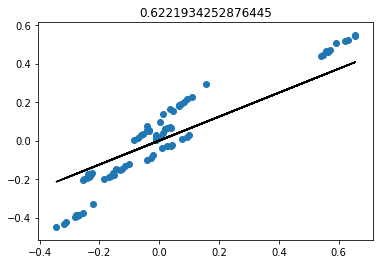

Iteration 166 | Cost: 0.006466 | theta -0.0000000000 0.62219343


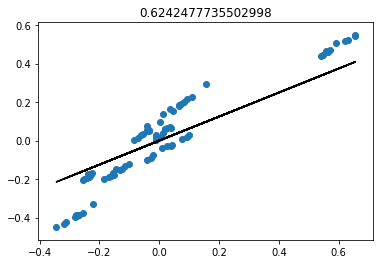

Iteration 167 | Cost: 0.006424 | theta -0.0000000000 0.62424777


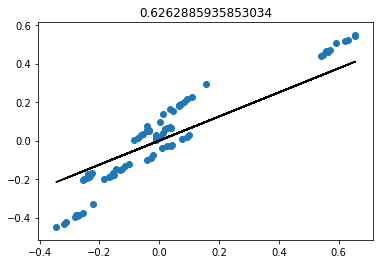

Iteration 168 | Cost: 0.006382 | theta -0.0000000000 0.62628859


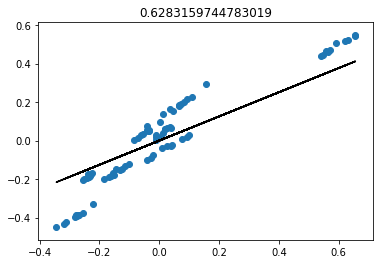

Iteration 169 | Cost: 0.006341 | theta -0.0000000000 0.62831597


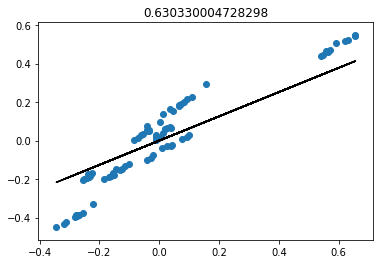

Iteration 170 | Cost: 0.006301 | theta -0.0000000000 0.63033000


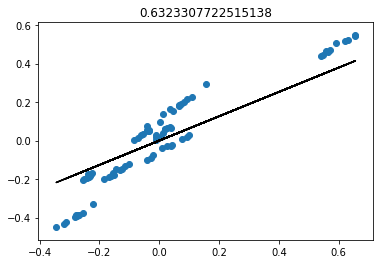

Iteration 171 | Cost: 0.006261 | theta -0.0000000000 0.63233077


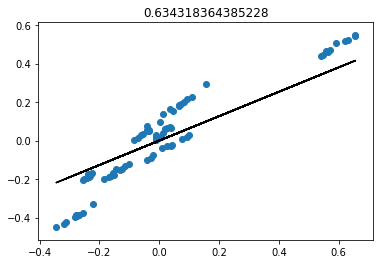

Iteration 172 | Cost: 0.006221 | theta -0.0000000000 0.63431836


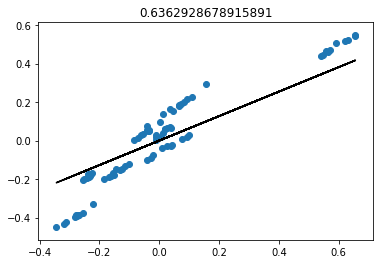

Iteration 173 | Cost: 0.006183 | theta -0.0000000000 0.63629287


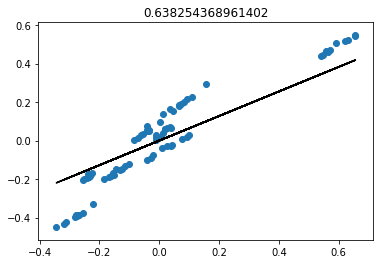

Iteration 174 | Cost: 0.006144 | theta -0.0000000000 0.63825437


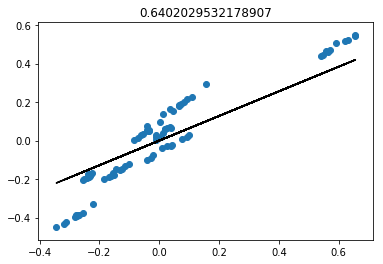

Iteration 175 | Cost: 0.006106 | theta -0.0000000000 0.64020295


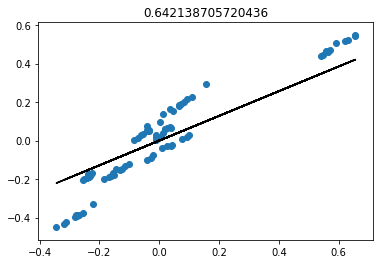

Iteration 176 | Cost: 0.006069 | theta -0.0000000000 0.64213871


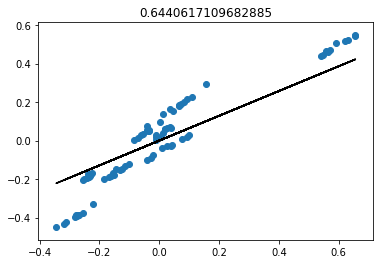

Iteration 177 | Cost: 0.006032 | theta -0.0000000000 0.64406171


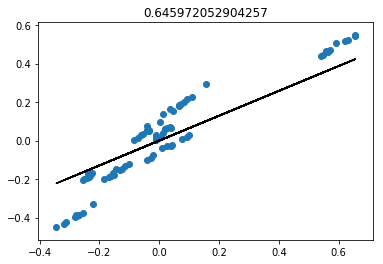

Iteration 178 | Cost: 0.005996 | theta -0.0000000000 0.64597205


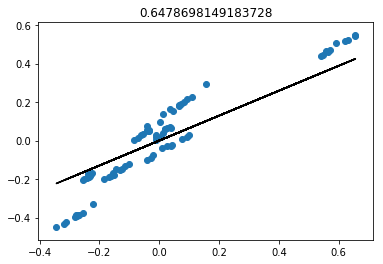

Iteration 179 | Cost: 0.005960 | theta -0.0000000000 0.64786981


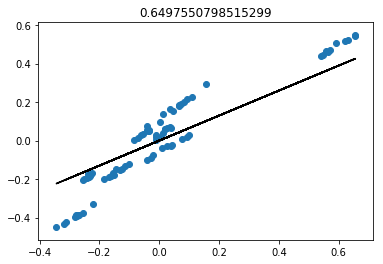

Iteration 180 | Cost: 0.005925 | theta -0.0000000000 0.64975508


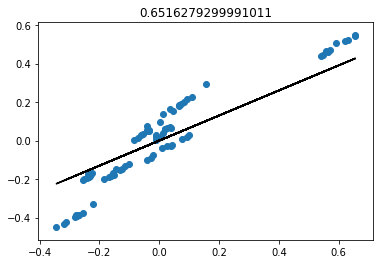

Iteration 181 | Cost: 0.005890 | theta -0.0000000000 0.65162793


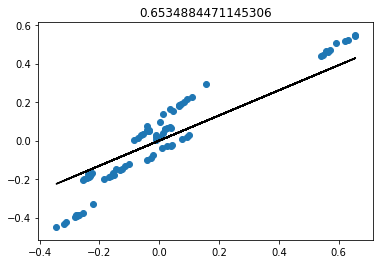

Iteration 182 | Cost: 0.005855 | theta -0.0000000000 0.65348845


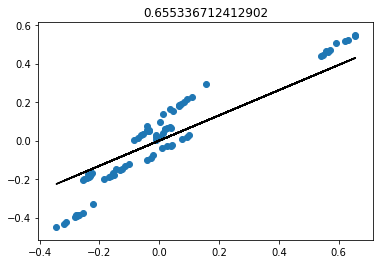

Iteration 183 | Cost: 0.005821 | theta -0.0000000000 0.65533671


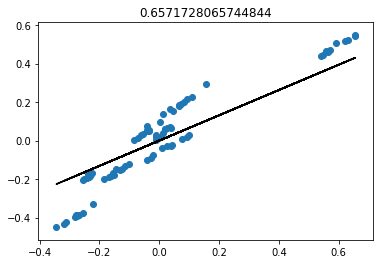

Iteration 184 | Cost: 0.005787 | theta -0.0000000000 0.65717281


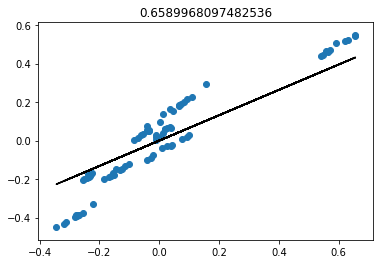

Iteration 185 | Cost: 0.005754 | theta -0.0000000000 0.65899681


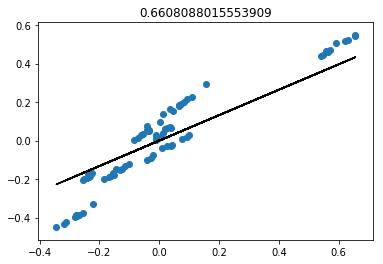

Iteration 186 | Cost: 0.005722 | theta -0.0000000000 0.66080880


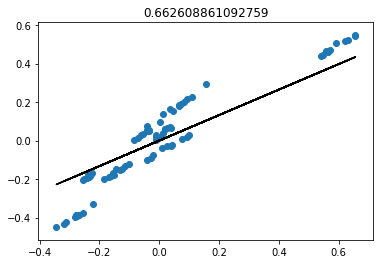

Iteration 187 | Cost: 0.005689 | theta -0.0000000000 0.66260886


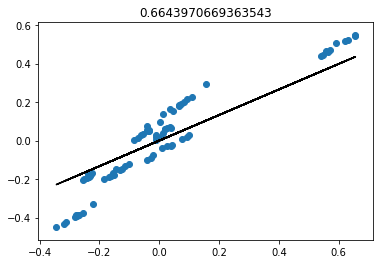

Iteration 188 | Cost: 0.005657 | theta -0.0000000000 0.66439707


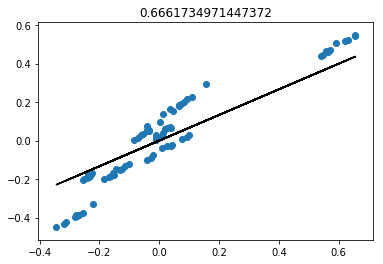

Iteration 189 | Cost: 0.005626 | theta -0.0000000000 0.66617350


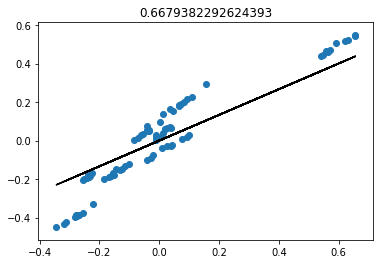

Iteration 190 | Cost: 0.005595 | theta -0.0000000000 0.66793823


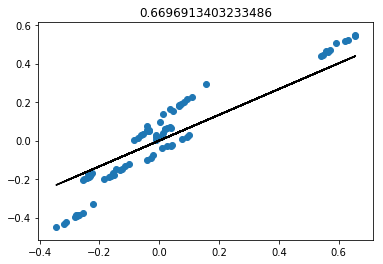

Iteration 191 | Cost: 0.005564 | theta -0.0000000000 0.66969134


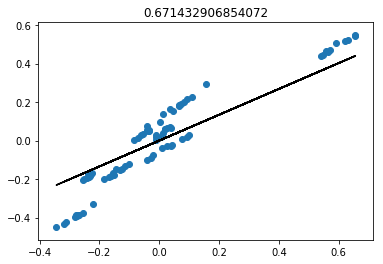

Iteration 192 | Cost: 0.005534 | theta -0.0000000000 0.67143291


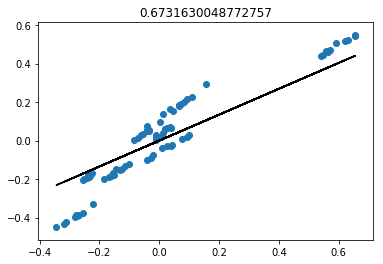

Iteration 193 | Cost: 0.005504 | theta -0.0000000000 0.67316300


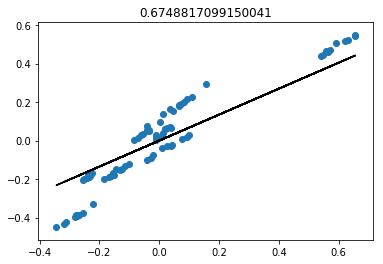

Iteration 194 | Cost: 0.005475 | theta -0.0000000000 0.67488171


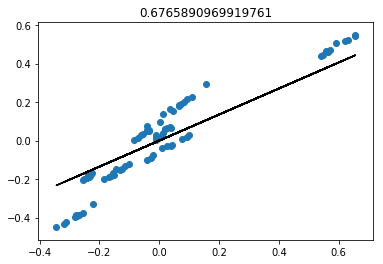

Iteration 195 | Cost: 0.005446 | theta -0.0000000000 0.67658910


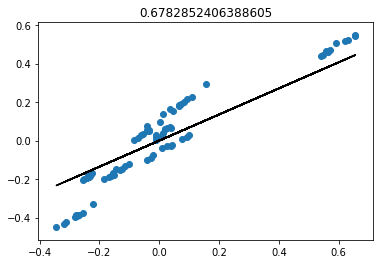

Iteration 196 | Cost: 0.005417 | theta -0.0000000000 0.67828524


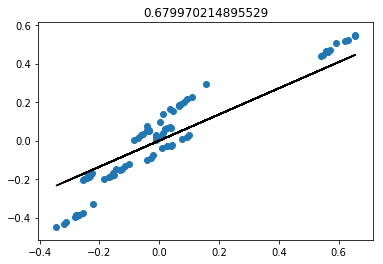

Iteration 197 | Cost: 0.005389 | theta -0.0000000000 0.67997021


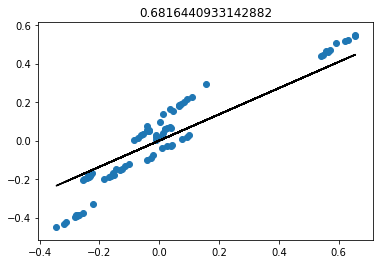

Iteration 198 | Cost: 0.005361 | theta -0.0000000000 0.68164409


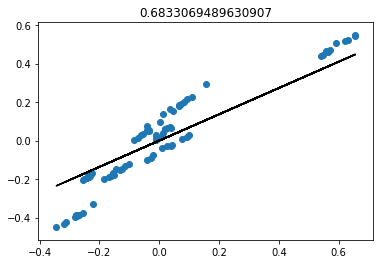

Iteration 199 | Cost: 0.005333 | theta -0.0000000000 0.68330695


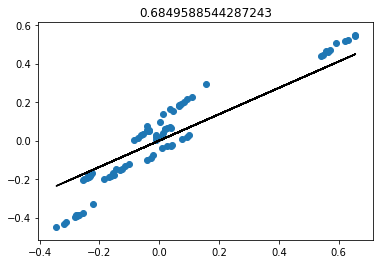

Iteration 200 | Cost: 0.005306 | theta -0.0000000000 0.68495885


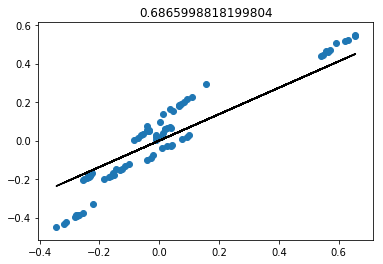

Iteration 201 | Cost: 0.005279 | theta -0.0000000000 0.68659988


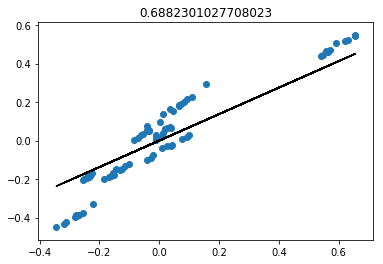

Iteration 202 | Cost: 0.005253 | theta -0.0000000000 0.68823010


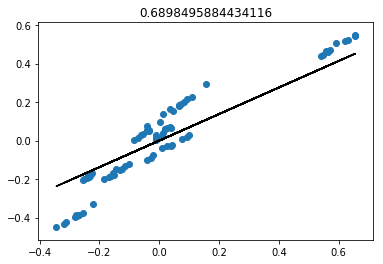

Iteration 203 | Cost: 0.005227 | theta -0.0000000000 0.68984959


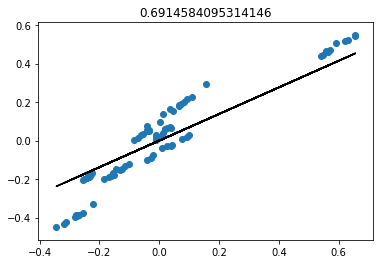

Iteration 204 | Cost: 0.005201 | theta -0.0000000000 0.69145841


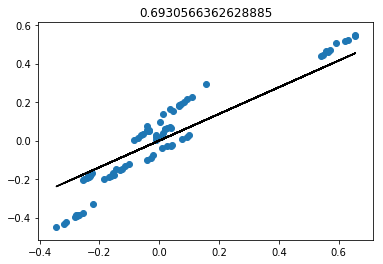

Iteration 205 | Cost: 0.005175 | theta -0.0000000000 0.69305664


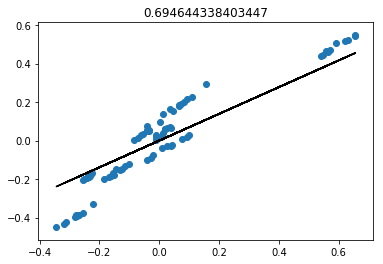

Iteration 206 | Cost: 0.005150 | theta -0.0000000000 0.69464434


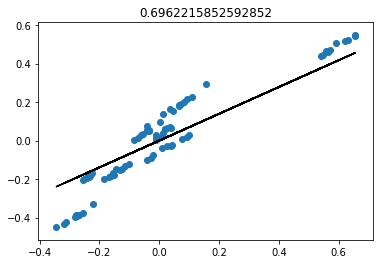

Iteration 207 | Cost: 0.005125 | theta -0.0000000000 0.69622159


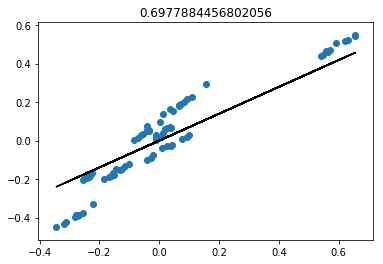

Iteration 208 | Cost: 0.005101 | theta -0.0000000000 0.69778845


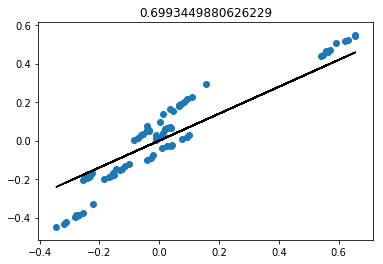

Iteration 209 | Cost: 0.005077 | theta -0.0000000000 0.69934499


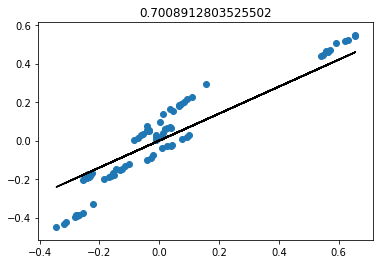

Iteration 210 | Cost: 0.005053 | theta -0.0000000000 0.70089128


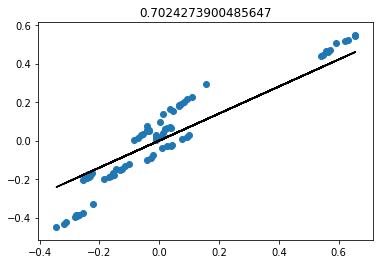

Iteration 211 | Cost: 0.005029 | theta -0.0000000000 0.70242739


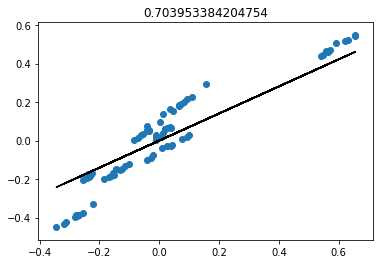

Iteration 212 | Cost: 0.005006 | theta -0.0000000000 0.70395338


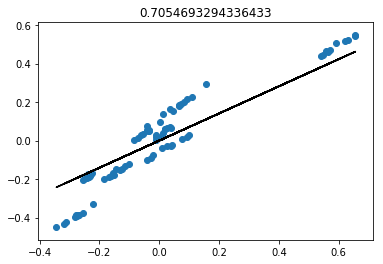

Iteration 213 | Cost: 0.004983 | theta -0.0000000000 0.70546933


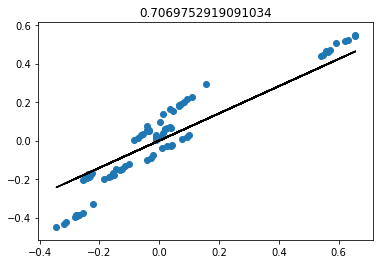

Iteration 214 | Cost: 0.004961 | theta -0.0000000000 0.70697529


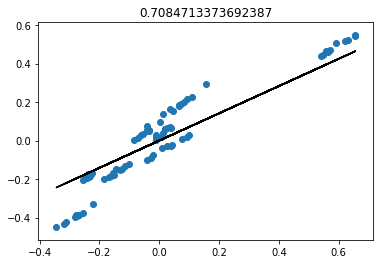

Iteration 215 | Cost: 0.004938 | theta -0.0000000000 0.70847134


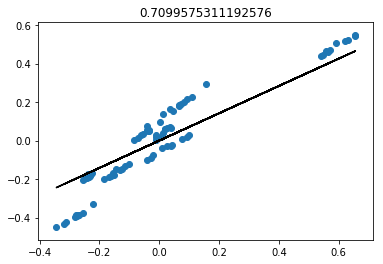

Iteration 216 | Cost: 0.004916 | theta -0.0000000000 0.70995753


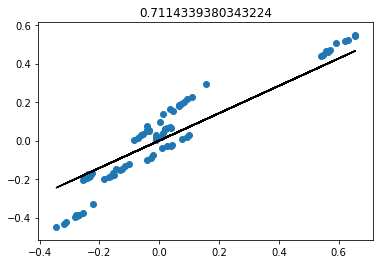

Iteration 217 | Cost: 0.004895 | theta -0.0000000000 0.71143394


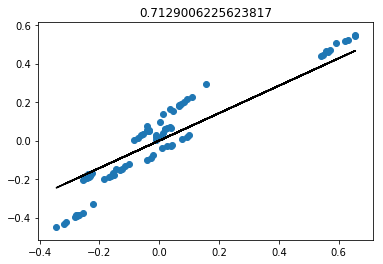

Iteration 218 | Cost: 0.004873 | theta -0.0000000000 0.71290062


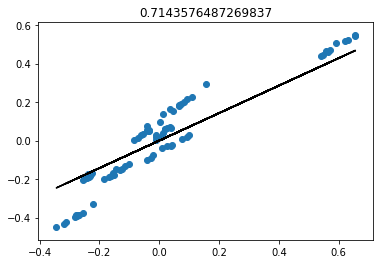

Iteration 219 | Cost: 0.004852 | theta -0.0000000000 0.71435765


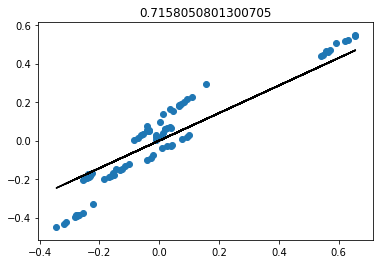

Iteration 220 | Cost: 0.004831 | theta -0.0000000000 0.71580508


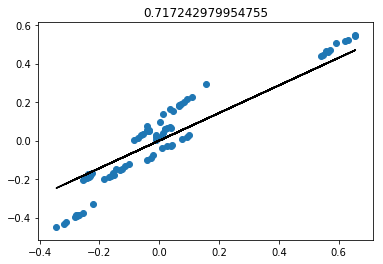

Iteration 221 | Cost: 0.004811 | theta -0.0000000000 0.71724298


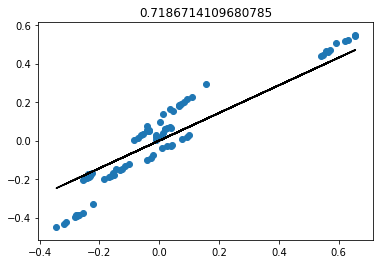

Iteration 222 | Cost: 0.004790 | theta -0.0000000000 0.71867141


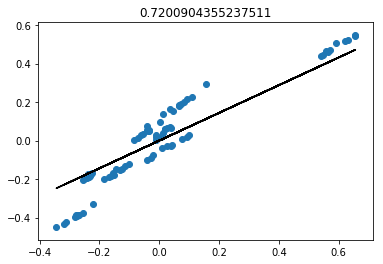

Iteration 223 | Cost: 0.004770 | theta -0.0000000000 0.72009044


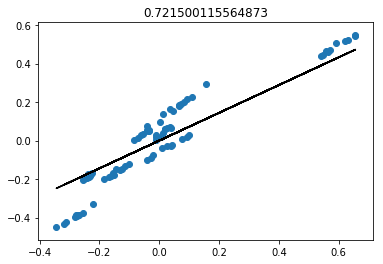

Iteration 224 | Cost: 0.004750 | theta -0.0000000000 0.72150012


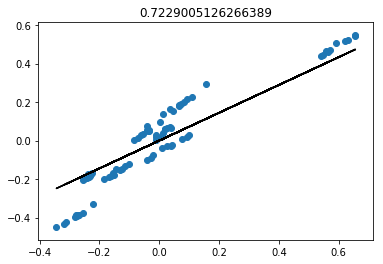

Iteration 225 | Cost: 0.004731 | theta -0.0000000000 0.72290051


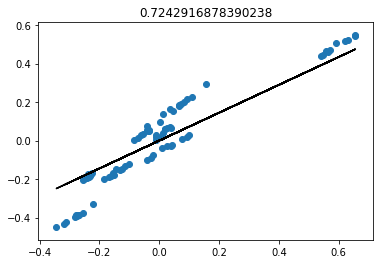

Iteration 226 | Cost: 0.004711 | theta -0.0000000000 0.72429169


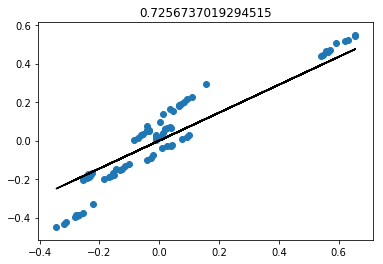

Iteration 227 | Cost: 0.004692 | theta -0.0000000000 0.72567370


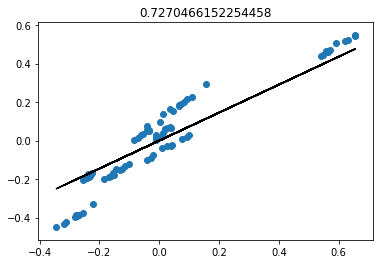

Iteration 228 | Cost: 0.004674 | theta -0.0000000000 0.72704662


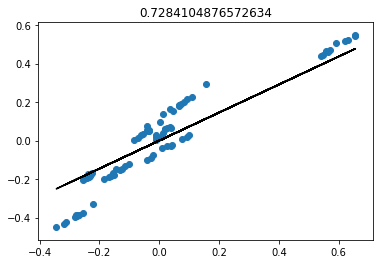

Iteration 229 | Cost: 0.004655 | theta -0.0000000000 0.72841049


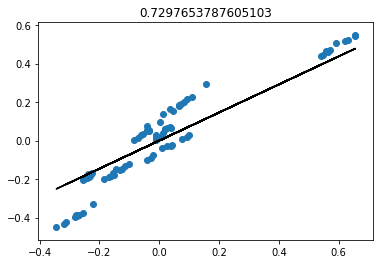

Iteration 230 | Cost: 0.004637 | theta -0.0000000000 0.72976538


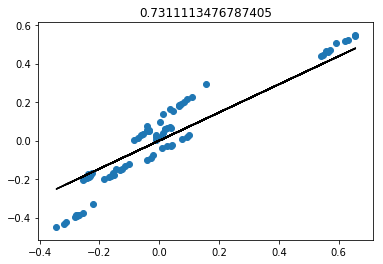

Iteration 231 | Cost: 0.004619 | theta -0.0000000000 0.73111135


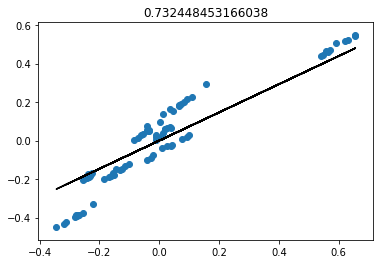

Iteration 232 | Cost: 0.004601 | theta -0.0000000000 0.73244845


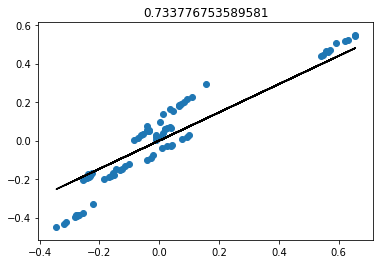

Iteration 233 | Cost: 0.004583 | theta -0.0000000000 0.73377675


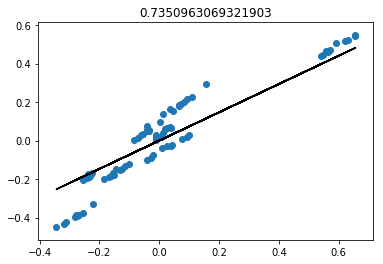

Iteration 234 | Cost: 0.004566 | theta -0.0000000000 0.73509631


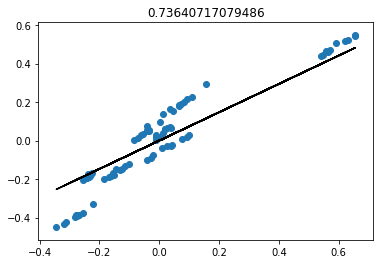

Iteration 235 | Cost: 0.004549 | theta -0.0000000000 0.73640717


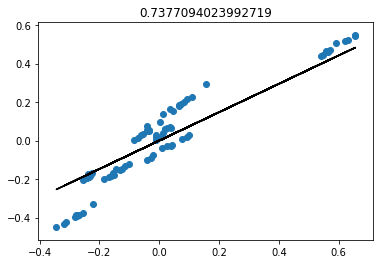

Iteration 236 | Cost: 0.004532 | theta -0.0000000000 0.73770940


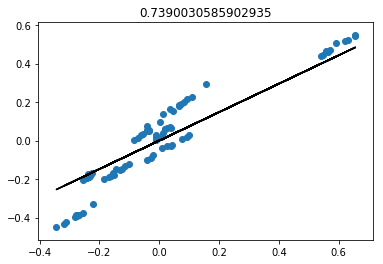

Iteration 237 | Cost: 0.004515 | theta -0.0000000000 0.73900306


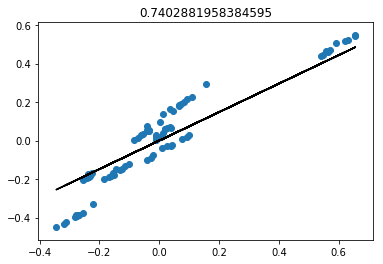

Iteration 238 | Cost: 0.004499 | theta -0.0000000000 0.74028820


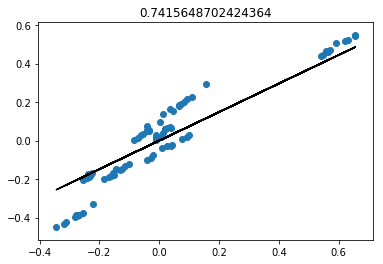

Iteration 239 | Cost: 0.004483 | theta -0.0000000000 0.74156487


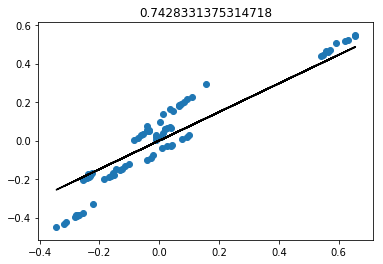

Iteration 240 | Cost: 0.004467 | theta -0.0000000000 0.74283314


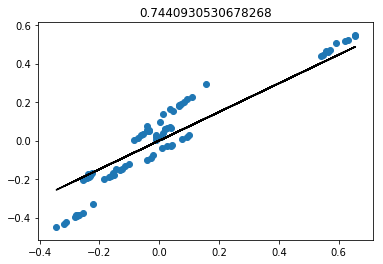

Iteration 241 | Cost: 0.004451 | theta -0.0000000000 0.74409305


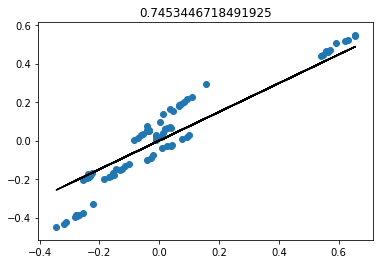

Iteration 242 | Cost: 0.004435 | theta -0.0000000000 0.74534467


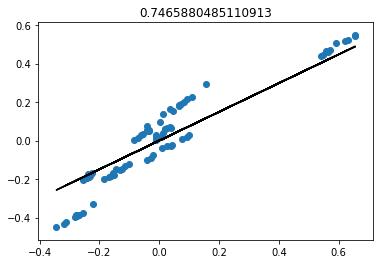

Iteration 243 | Cost: 0.004420 | theta -0.0000000000 0.74658805


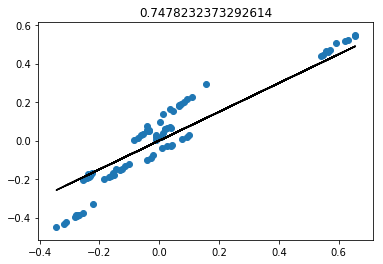

Iteration 244 | Cost: 0.004404 | theta -0.0000000000 0.74782324


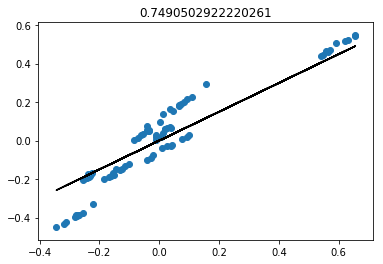

Iteration 245 | Cost: 0.004389 | theta -0.0000000000 0.74905029


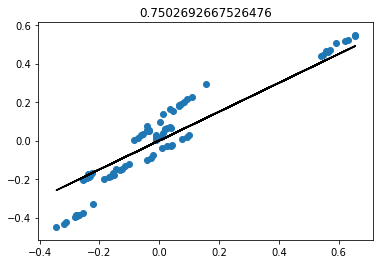

Iteration 246 | Cost: 0.004375 | theta -0.0000000000 0.75026927


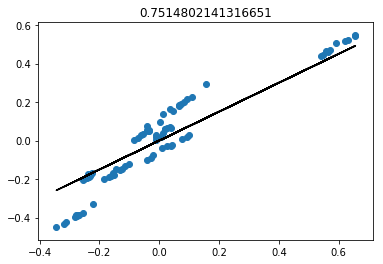

Iteration 247 | Cost: 0.004360 | theta -0.0000000000 0.75148021


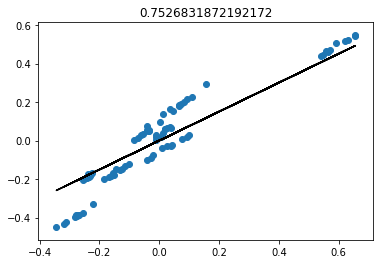

Iteration 248 | Cost: 0.004346 | theta -0.0000000000 0.75268319


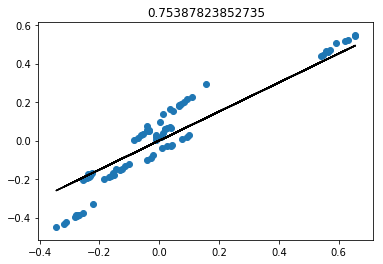

Iteration 249 | Cost: 0.004331 | theta -0.0000000000 0.75387824


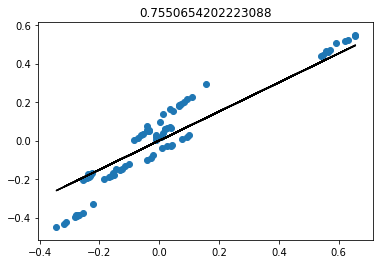

Iteration 250 | Cost: 0.004317 | theta -0.0000000000 0.75506542


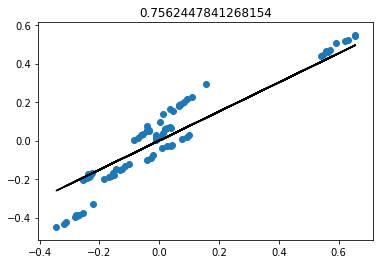

Iteration 251 | Cost: 0.004303 | theta -0.0000000000 0.75624478


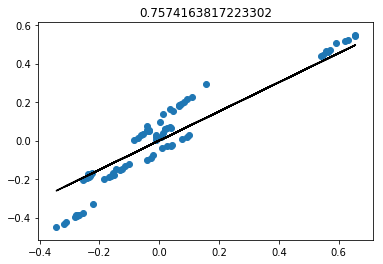

Iteration 252 | Cost: 0.004290 | theta -0.0000000000 0.75741638


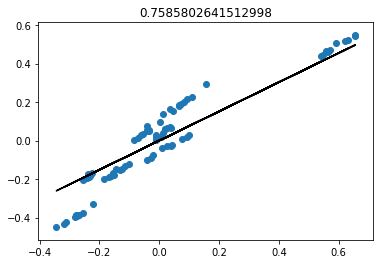

Iteration 253 | Cost: 0.004276 | theta -0.0000000000 0.75858026


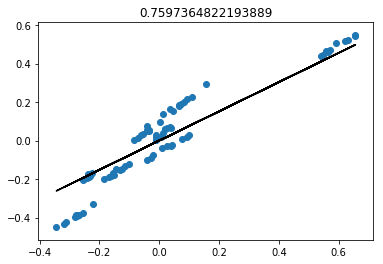

Iteration 254 | Cost: 0.004263 | theta -0.0000000000 0.75973648


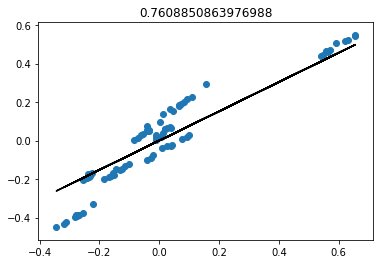

Iteration 255 | Cost: 0.004250 | theta -0.0000000000 0.76088509


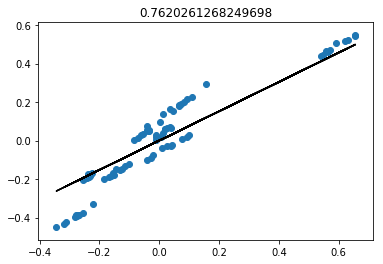

Iteration 256 | Cost: 0.004237 | theta -0.0000000000 0.76202613


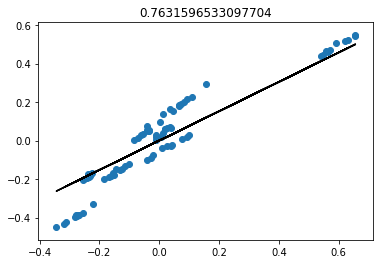

Iteration 257 | Cost: 0.004224 | theta -0.0000000000 0.76315965


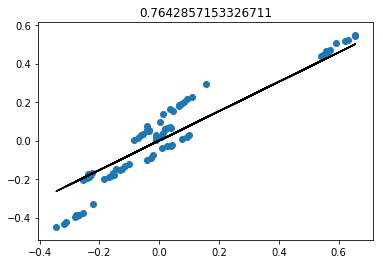

Iteration 258 | Cost: 0.004211 | theta -0.0000000000 0.76428572


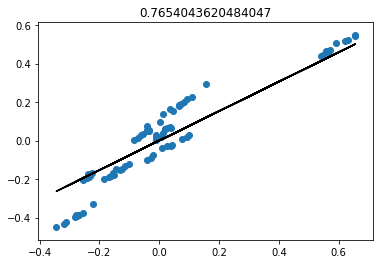

Iteration 259 | Cost: 0.004199 | theta -0.0000000000 0.76540436


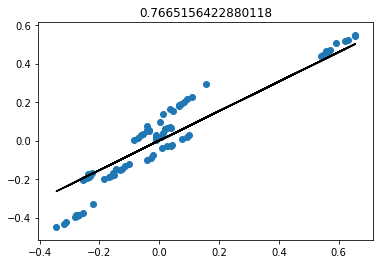

Iteration 260 | Cost: 0.004187 | theta -0.0000000000 0.76651564


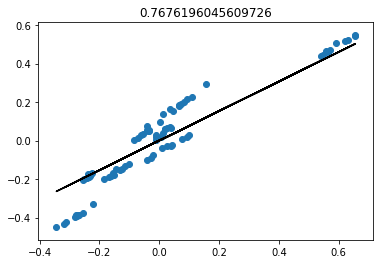

Iteration 261 | Cost: 0.004174 | theta -0.0000000000 0.76761960


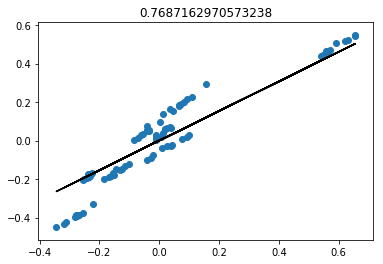

Iteration 262 | Cost: 0.004162 | theta -0.0000000000 0.76871630


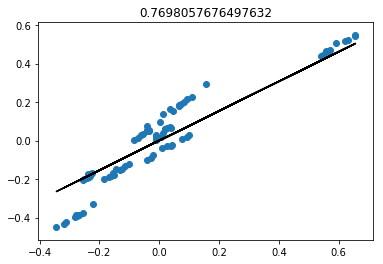

Iteration 263 | Cost: 0.004151 | theta -0.0000000000 0.76980577


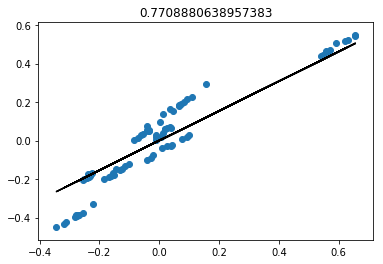

Iteration 264 | Cost: 0.004139 | theta -0.0000000000 0.77088806


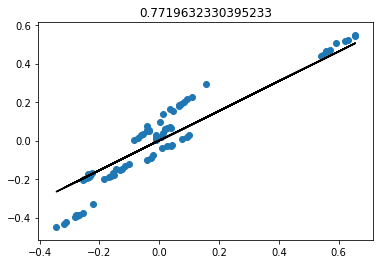

Iteration 265 | Cost: 0.004127 | theta -0.0000000000 0.77196323


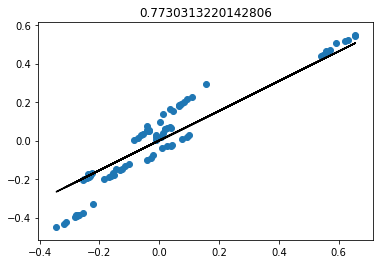

Iteration 266 | Cost: 0.004116 | theta -0.0000000000 0.77303132


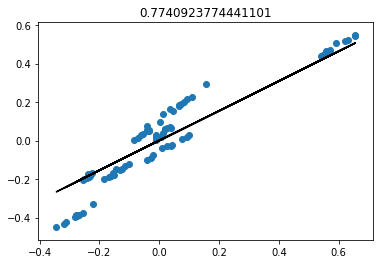

Iteration 267 | Cost: 0.004105 | theta -0.0000000000 0.77409238


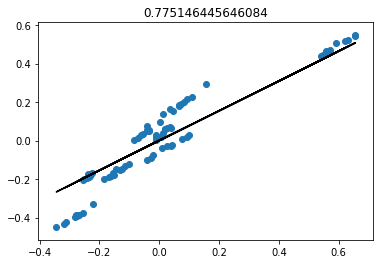

Iteration 268 | Cost: 0.004094 | theta -0.0000000000 0.77514645


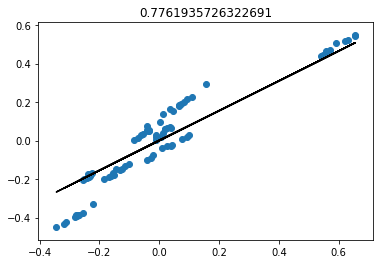

Iteration 269 | Cost: 0.004083 | theta -0.0000000000 0.77619357


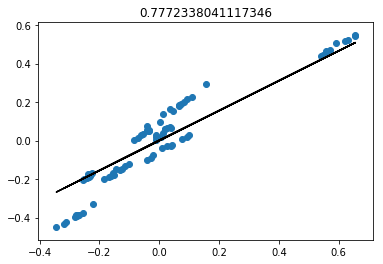

Iteration 270 | Cost: 0.004072 | theta -0.0000000000 0.77723380


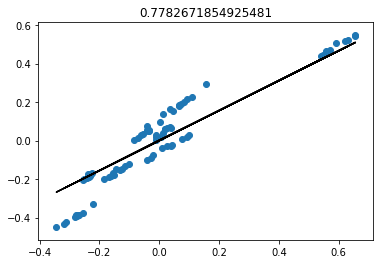

Iteration 271 | Cost: 0.004061 | theta -0.0000000000 0.77826719


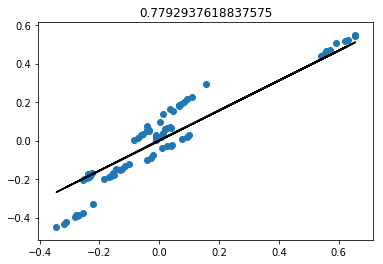

Iteration 272 | Cost: 0.004051 | theta -0.0000000000 0.77929376


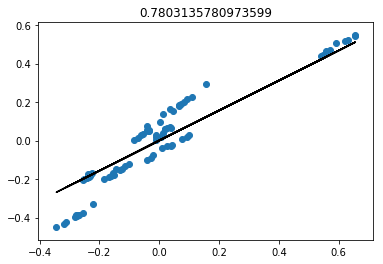

Iteration 273 | Cost: 0.004041 | theta -0.0000000000 0.78031358


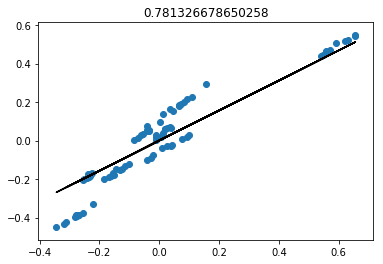

Iteration 274 | Cost: 0.004030 | theta -0.0000000000 0.78132668


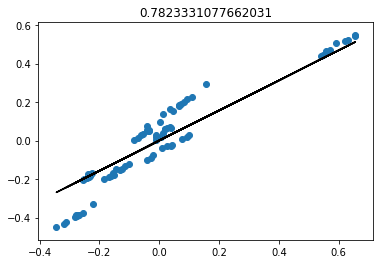

Iteration 275 | Cost: 0.004020 | theta -0.0000000000 0.78233311


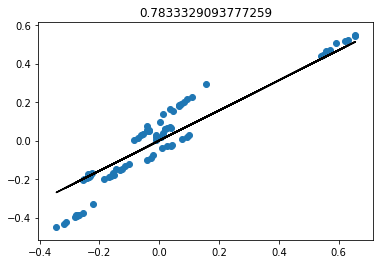

Iteration 276 | Cost: 0.004010 | theta -0.0000000000 0.78333291


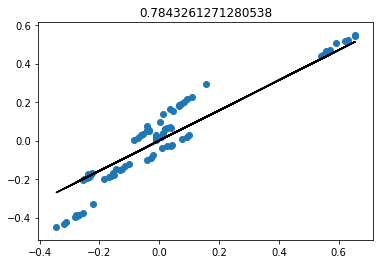

Iteration 277 | Cost: 0.004000 | theta -0.0000000000 0.78432613


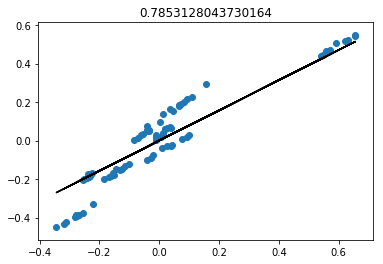

Iteration 278 | Cost: 0.003991 | theta -0.0000000000 0.78531280


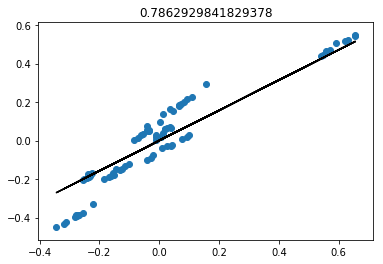

Iteration 279 | Cost: 0.003981 | theta -0.0000000000 0.78629298


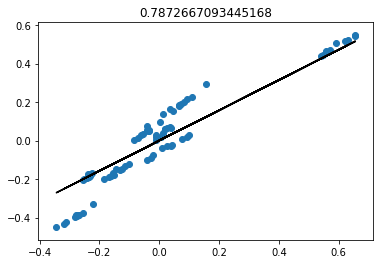

Iteration 280 | Cost: 0.003972 | theta -0.0000000000 0.78726671


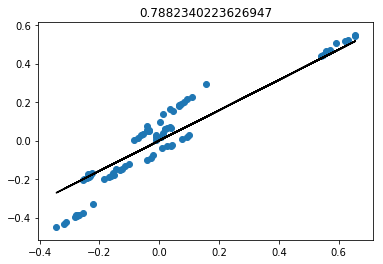

Iteration 281 | Cost: 0.003962 | theta -0.0000000000 0.78823402


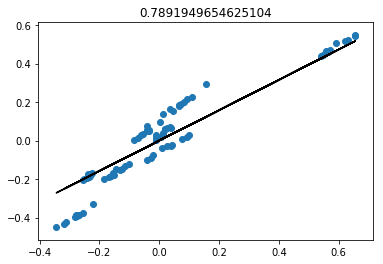

Iteration 282 | Cost: 0.003953 | theta -0.0000000000 0.78919497


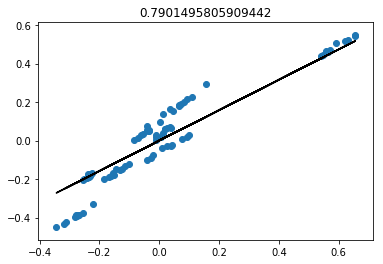

Iteration 283 | Cost: 0.003944 | theta -0.0000000000 0.79014958


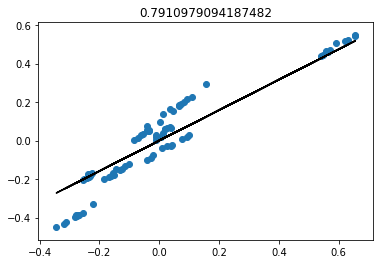

Iteration 284 | Cost: 0.003935 | theta -0.0000000000 0.79109791


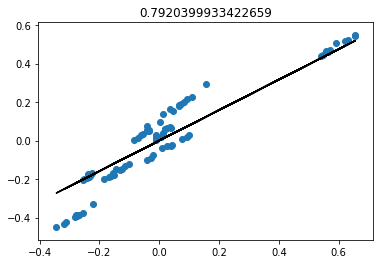

Iteration 285 | Cost: 0.003926 | theta -0.0000000000 0.79203999


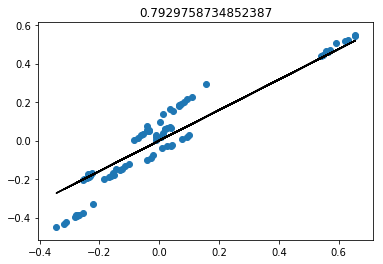

Iteration 286 | Cost: 0.003918 | theta -0.0000000000 0.79297587


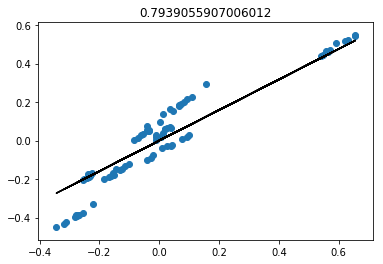

Iteration 287 | Cost: 0.003909 | theta -0.0000000000 0.79390559


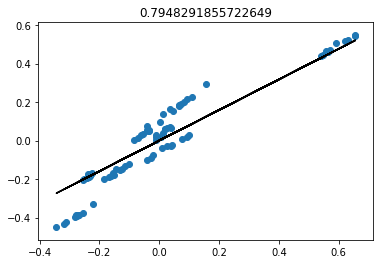

Iteration 288 | Cost: 0.003900 | theta -0.0000000000 0.79482919


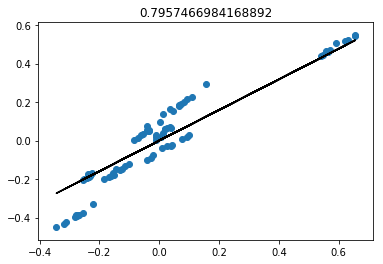

Iteration 289 | Cost: 0.003892 | theta -0.0000000000 0.79574670


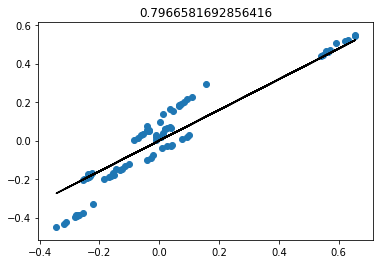

Iteration 290 | Cost: 0.003884 | theta -0.0000000000 0.79665817


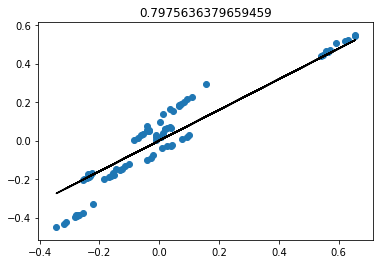

Iteration 291 | Cost: 0.003876 | theta -0.0000000000 0.79756364


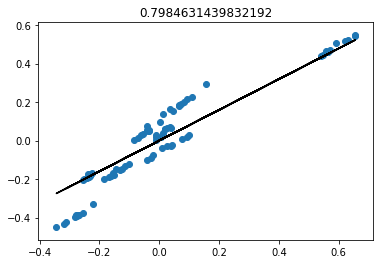

Iteration 292 | Cost: 0.003868 | theta -0.0000000000 0.79846314


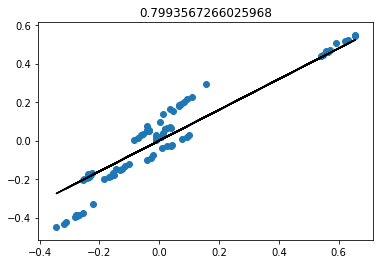

Iteration 293 | Cost: 0.003860 | theta -0.0000000000 0.79935673


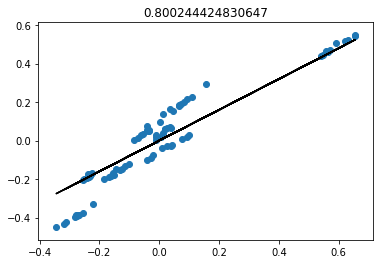

Iteration 294 | Cost: 0.003852 | theta -0.0000000000 0.80024442


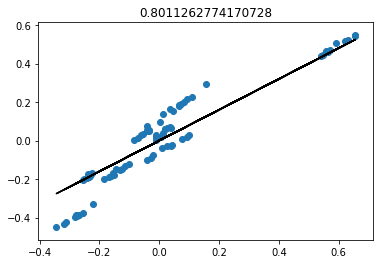

Iteration 295 | Cost: 0.003844 | theta -0.0000000000 0.80112628


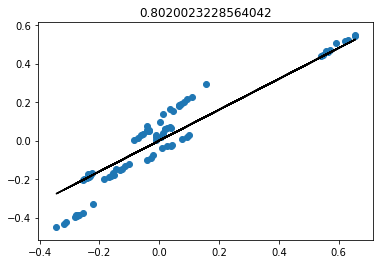

Iteration 296 | Cost: 0.003836 | theta -0.0000000000 0.80200232


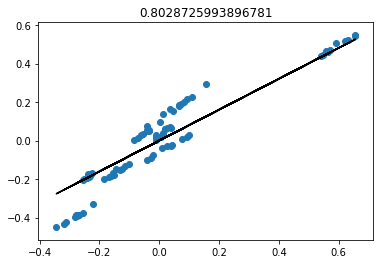

Iteration 297 | Cost: 0.003829 | theta -0.0000000000 0.80287260


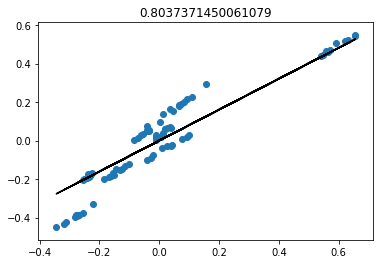

Iteration 298 | Cost: 0.003821 | theta -0.0000000000 0.80373715


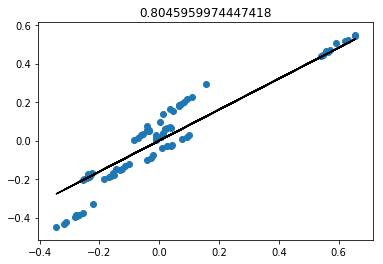

Iteration 299 | Cost: 0.003814 | theta -0.0000000000 0.80459600


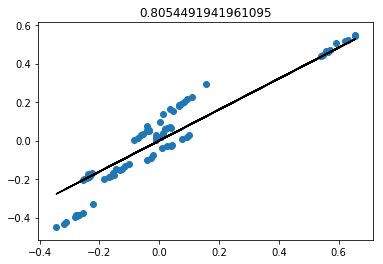

Iteration 300 | Cost: 0.003807 | theta -0.0000000000 0.80544919


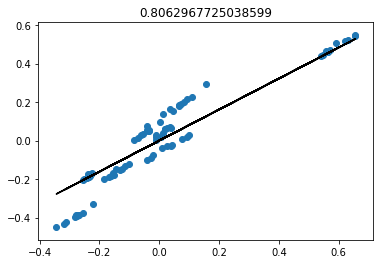

Iteration 301 | Cost: 0.003800 | theta -0.0000000000 0.80629677


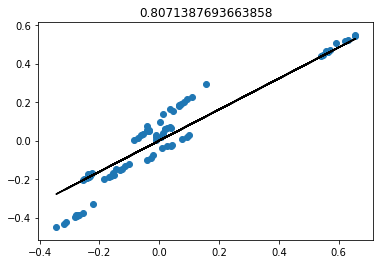

Iteration 302 | Cost: 0.003793 | theta -0.0000000000 0.80713877


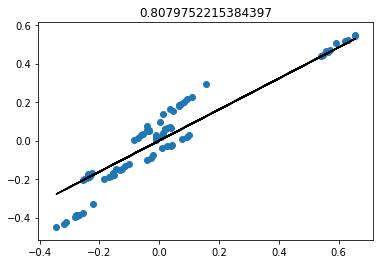

Iteration 303 | Cost: 0.003786 | theta -0.0000000000 0.80797522


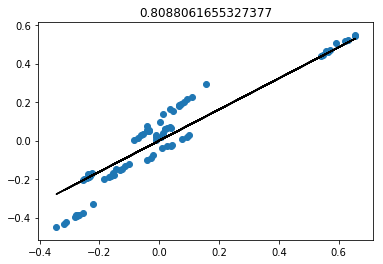

Iteration 304 | Cost: 0.003779 | theta -0.0000000000 0.80880617


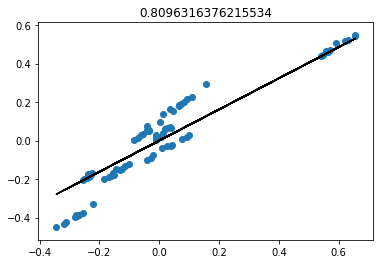

Iteration 305 | Cost: 0.003772 | theta -0.0000000000 0.80963164


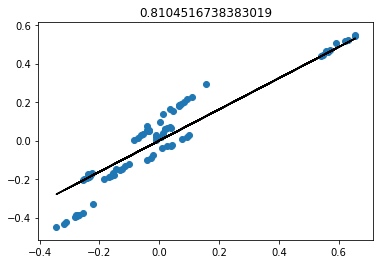

Iteration 306 | Cost: 0.003765 | theta -0.0000000000 0.81045167


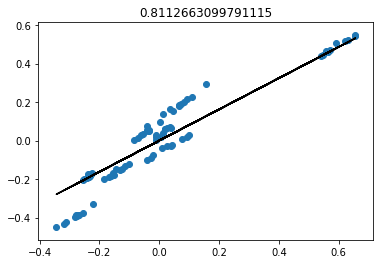

Iteration 307 | Cost: 0.003759 | theta -0.0000000000 0.81126631


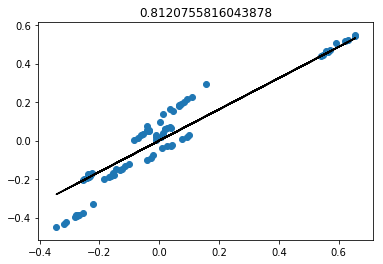

Iteration 308 | Cost: 0.003752 | theta -0.0000000000 0.81207558


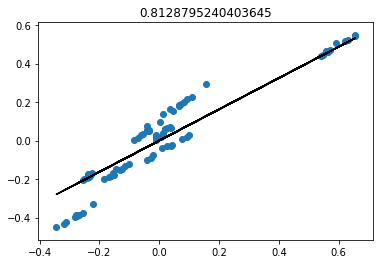

Iteration 309 | Cost: 0.003746 | theta -0.0000000000 0.81287952


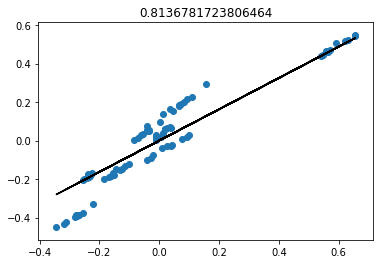

Iteration 310 | Cost: 0.003739 | theta -0.0000000000 0.81367817


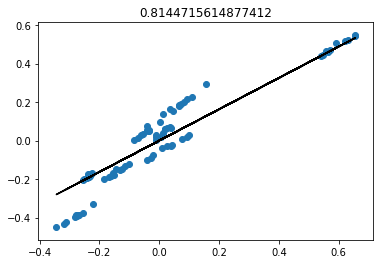

Iteration 311 | Cost: 0.003733 | theta -0.0000000000 0.81447156


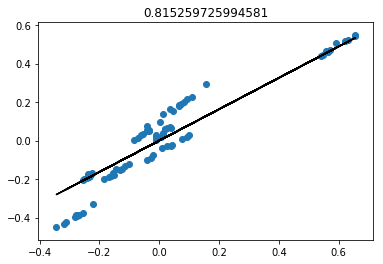

Iteration 312 | Cost: 0.003727 | theta -0.0000000000 0.81525973


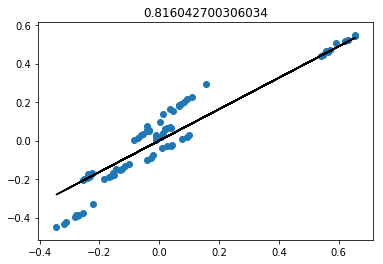

Iteration 313 | Cost: 0.003721 | theta -0.0000000000 0.81604270


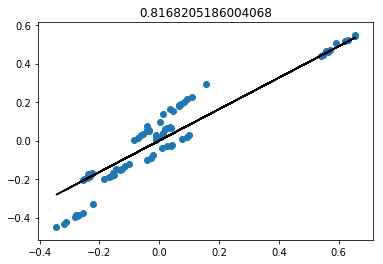

Iteration 314 | Cost: 0.003715 | theta -0.0000000000 0.81682052


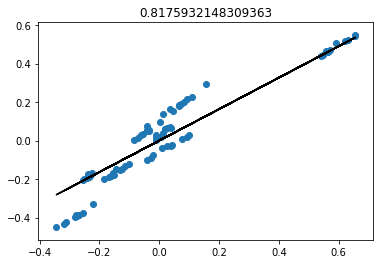

Iteration 315 | Cost: 0.003709 | theta -0.0000000000 0.81759321


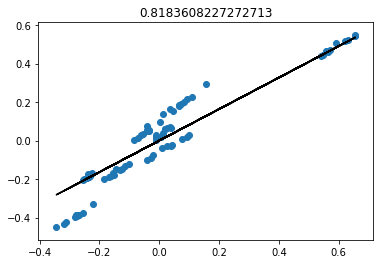

Iteration 316 | Cost: 0.003703 | theta -0.0000000000 0.81836082


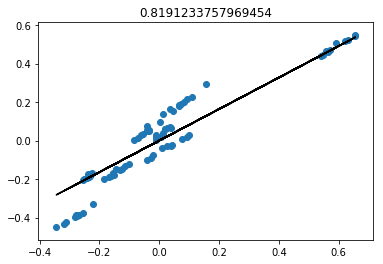

Iteration 317 | Cost: 0.003697 | theta -0.0000000000 0.81912338


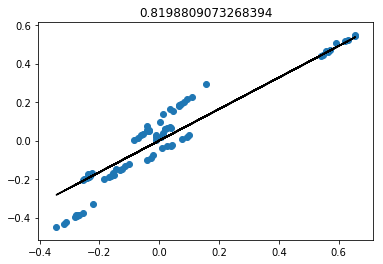

Iteration 318 | Cost: 0.003691 | theta -0.0000000000 0.81988091


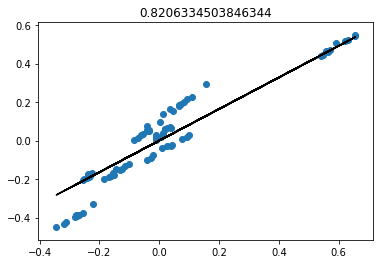

Iteration 319 | Cost: 0.003686 | theta -0.0000000000 0.82063345


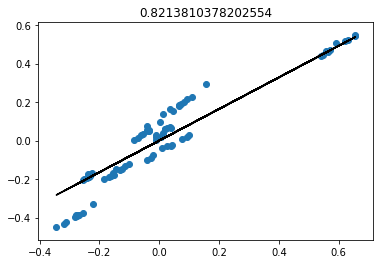

Iteration 320 | Cost: 0.003680 | theta -0.0000000000 0.82138104


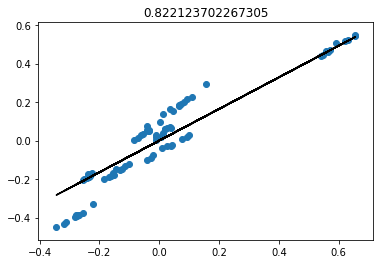

Iteration 321 | Cost: 0.003675 | theta -0.0000000000 0.82212370


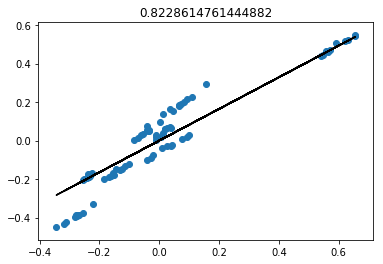

Iteration 322 | Cost: 0.003669 | theta -0.0000000000 0.82286148


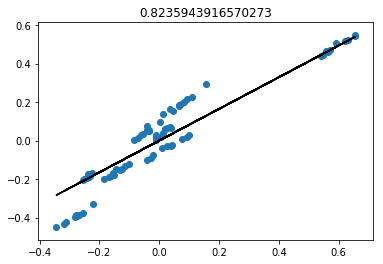

Iteration 323 | Cost: 0.003664 | theta -0.0000000000 0.82359439


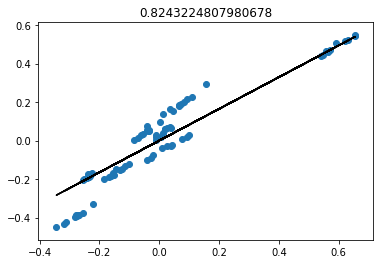

Iteration 324 | Cost: 0.003658 | theta -0.0000000000 0.82432248


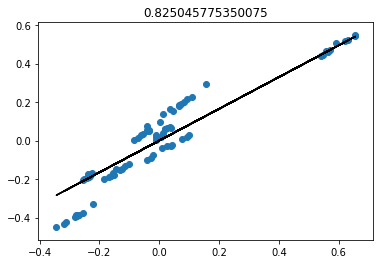

Iteration 325 | Cost: 0.003653 | theta -0.0000000000 0.82504578


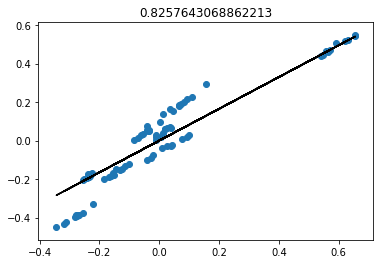

Iteration 326 | Cost: 0.003648 | theta -0.0000000000 0.82576431


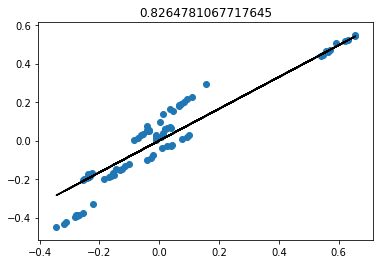

Iteration 327 | Cost: 0.003643 | theta -0.0000000000 0.82647811


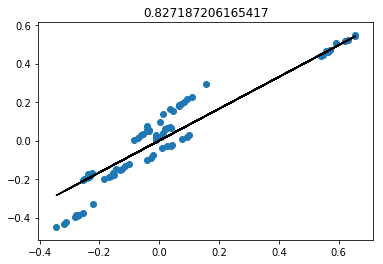

Iteration 328 | Cost: 0.003638 | theta -0.0000000000 0.82718721


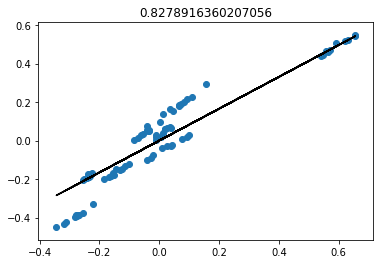

Iteration 329 | Cost: 0.003633 | theta -0.0000000000 0.82789164


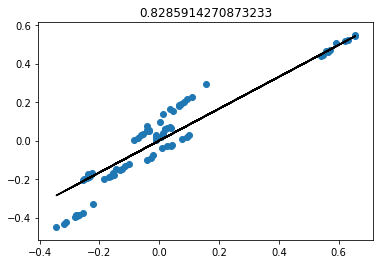

Iteration 330 | Cost: 0.003628 | theta -0.0000000000 0.82859143


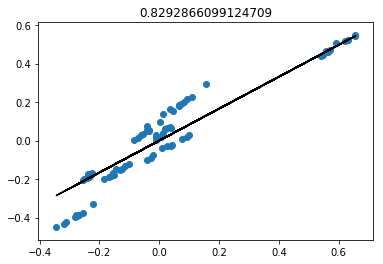

Iteration 331 | Cost: 0.003623 | theta -0.0000000000 0.82928661


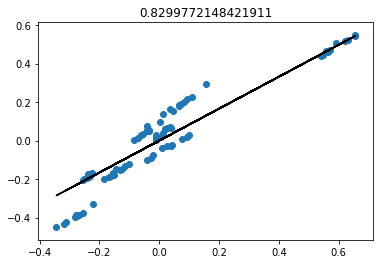

Iteration 332 | Cost: 0.003619 | theta -0.0000000000 0.82997721


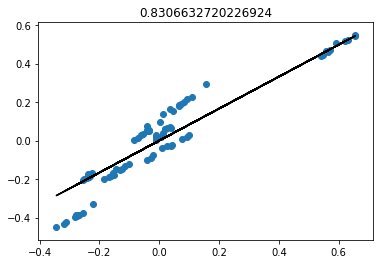

Iteration 333 | Cost: 0.003614 | theta -0.0000000000 0.83066327


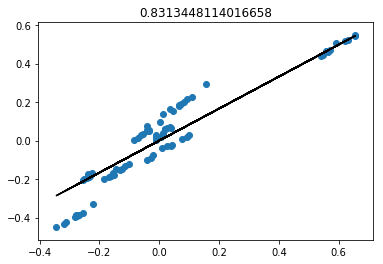

Iteration 334 | Cost: 0.003609 | theta -0.0000000000 0.83134481


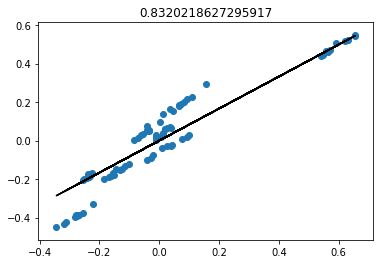

Iteration 335 | Cost: 0.003605 | theta -0.0000000000 0.83202186


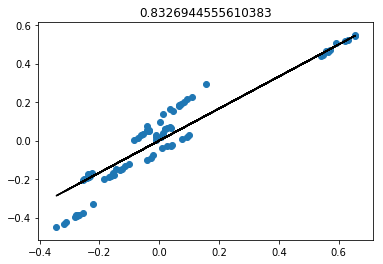

Iteration 336 | Cost: 0.003600 | theta -0.0000000000 0.83269446


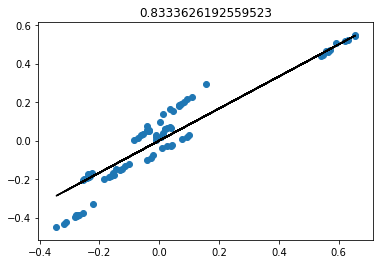

Iteration 337 | Cost: 0.003596 | theta -0.0000000000 0.83336262


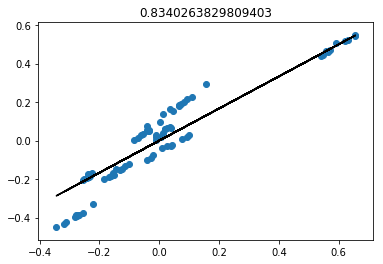

Iteration 338 | Cost: 0.003591 | theta -0.0000000000 0.83402638


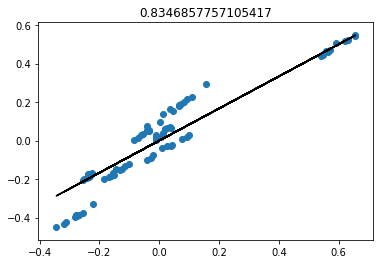

Iteration 339 | Cost: 0.003587 | theta -0.0000000000 0.83468578


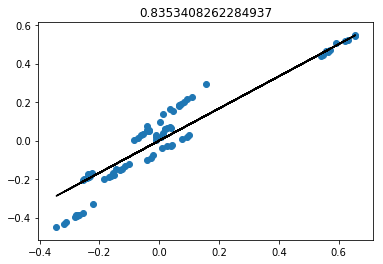

Iteration 340 | Cost: 0.003583 | theta -0.0000000000 0.83534083


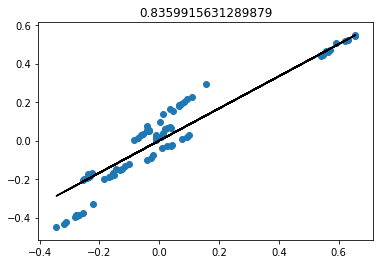

Iteration 341 | Cost: 0.003579 | theta -0.0000000000 0.83599156


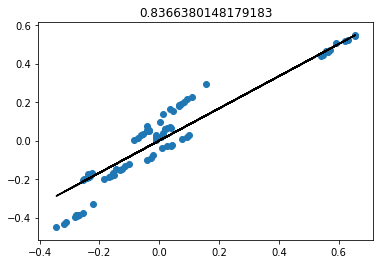

Iteration 342 | Cost: 0.003574 | theta -0.0000000000 0.83663801


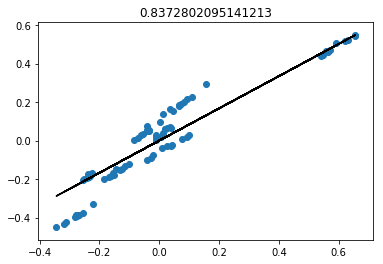

Iteration 343 | Cost: 0.003570 | theta -0.0000000000 0.83728021


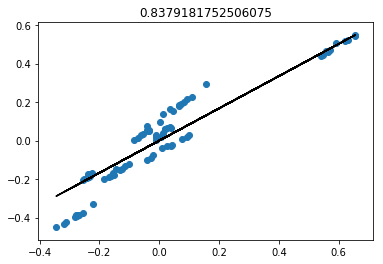

Iteration 344 | Cost: 0.003566 | theta -0.0000000000 0.83791818


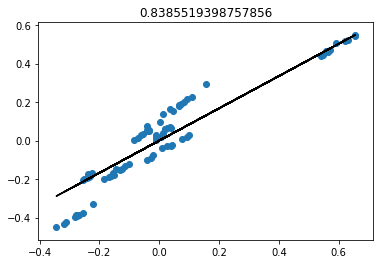

Iteration 345 | Cost: 0.003562 | theta -0.0000000000 0.83855194


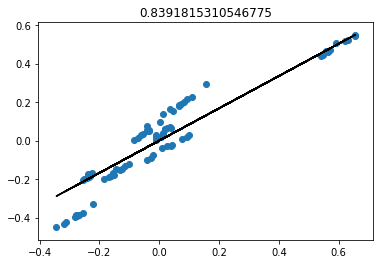

Iteration 346 | Cost: 0.003558 | theta -0.0000000000 0.83918153


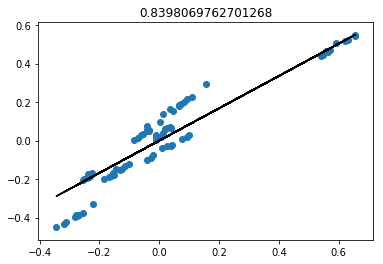

Iteration 347 | Cost: 0.003554 | theta -0.0000000000 0.83980698


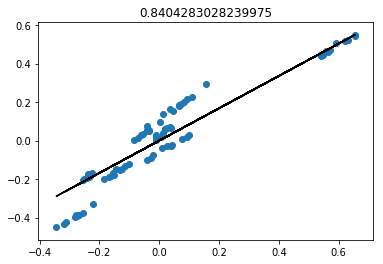

Iteration 348 | Cost: 0.003551 | theta -0.0000000000 0.84042830


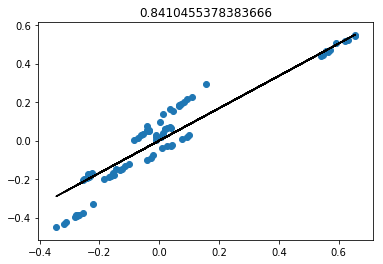

Iteration 349 | Cost: 0.003547 | theta -0.0000000000 0.84104554


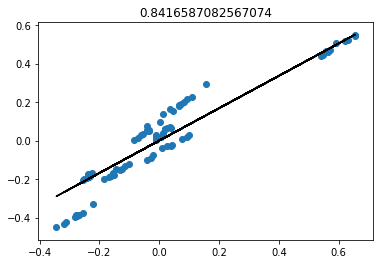

Iteration 350 | Cost: 0.003543 | theta -0.0000000000 0.84165871


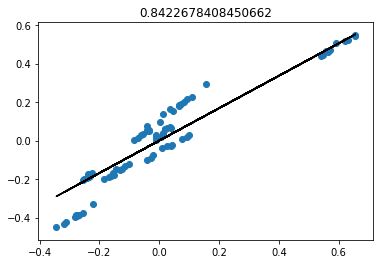

Iteration 351 | Cost: 0.003539 | theta -0.0000000000 0.84226784


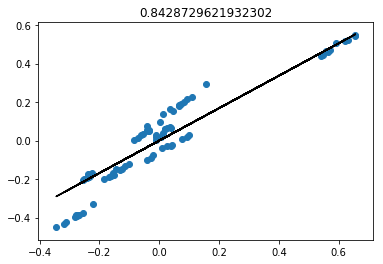

Iteration 352 | Cost: 0.003536 | theta -0.0000000000 0.84287296


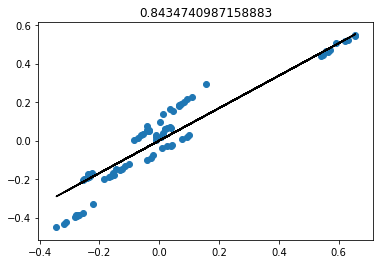

Iteration 353 | Cost: 0.003532 | theta -0.0000000000 0.84347410


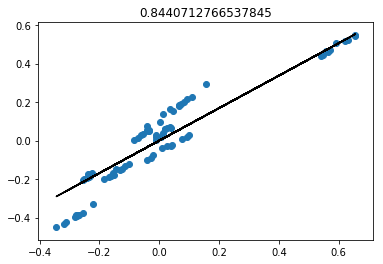

Iteration 354 | Cost: 0.003528 | theta -0.0000000000 0.84407128


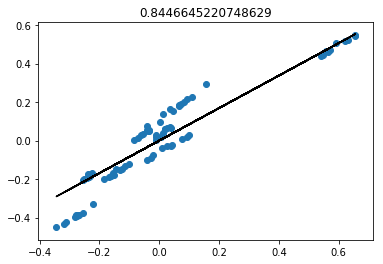

Iteration 355 | Cost: 0.003525 | theta -0.0000000000 0.84466452


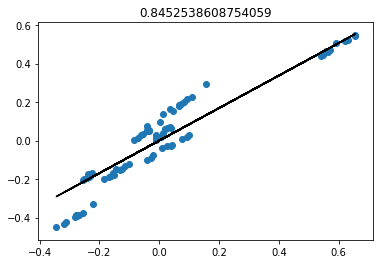

Iteration 356 | Cost: 0.003522 | theta -0.0000000000 0.84525386


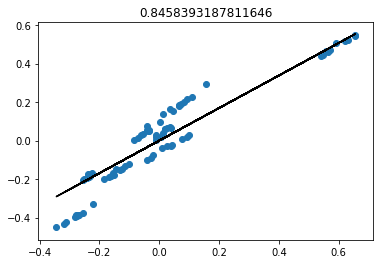

Iteration 357 | Cost: 0.003518 | theta -0.0000000000 0.84583932


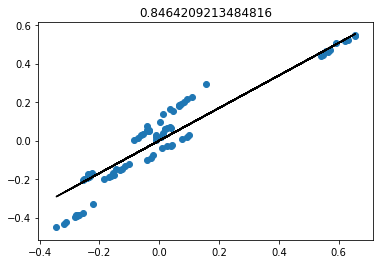

Iteration 358 | Cost: 0.003515 | theta -0.0000000000 0.84642092


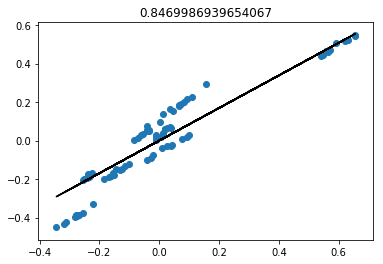

Iteration 359 | Cost: 0.003511 | theta -0.0000000000 0.84699869


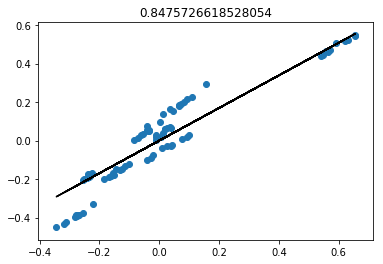

Iteration 360 | Cost: 0.003508 | theta -0.0000000000 0.84757266


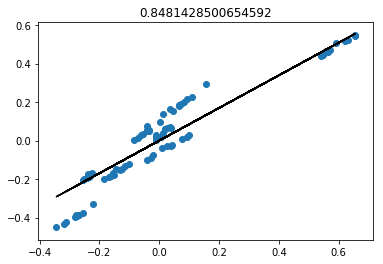

Iteration 361 | Cost: 0.003505 | theta -0.0000000000 0.84814285


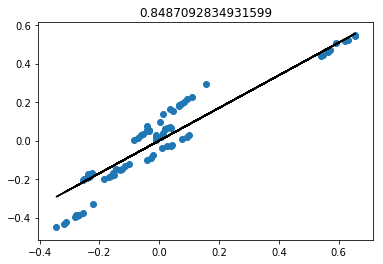

Iteration 362 | Cost: 0.003502 | theta -0.0000000000 0.84870928


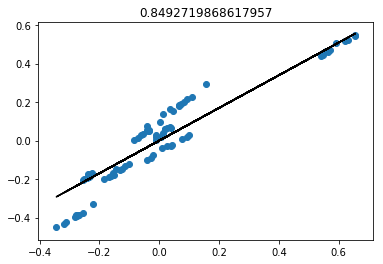

Iteration 363 | Cost: 0.003499 | theta -0.0000000000 0.84927199


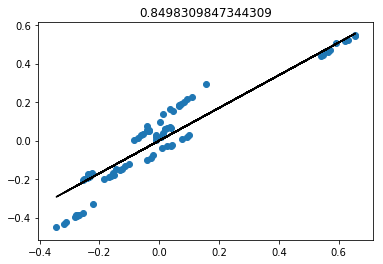

Iteration 364 | Cost: 0.003495 | theta -0.0000000000 0.84983098


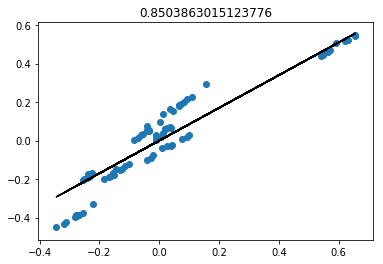

Iteration 365 | Cost: 0.003492 | theta -0.0000000000 0.85038630


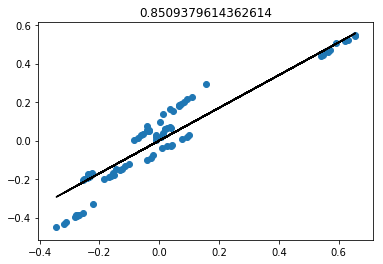

Iteration 366 | Cost: 0.003489 | theta -0.0000000000 0.85093796


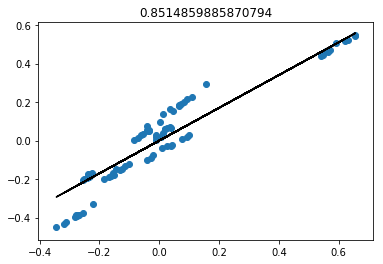

Iteration 367 | Cost: 0.003486 | theta -0.0000000000 0.85148599


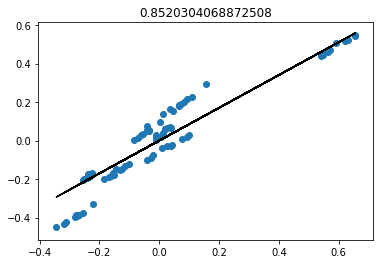

Iteration 368 | Cost: 0.003483 | theta -0.0000000000 0.85203041


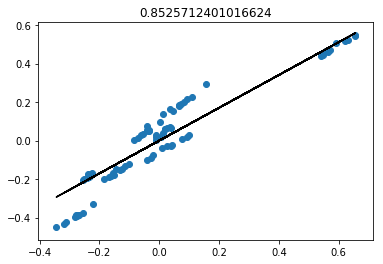

Iteration 369 | Cost: 0.003480 | theta -0.0000000000 0.85257124


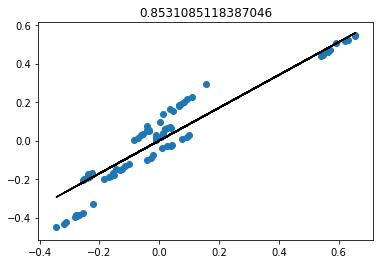

Iteration 370 | Cost: 0.003478 | theta -0.0000000000 0.85310851


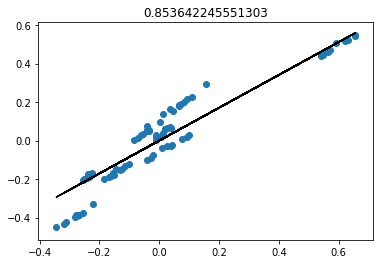

Iteration 371 | Cost: 0.003475 | theta -0.0000000000 0.85364225


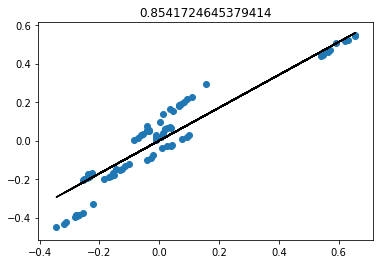

Iteration 372 | Cost: 0.003472 | theta -0.0000000000 0.85417246


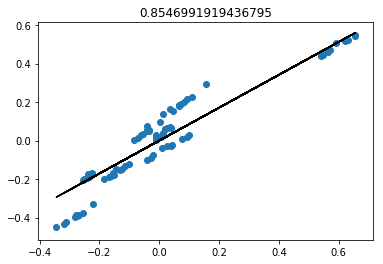

Iteration 373 | Cost: 0.003469 | theta -0.0000000000 0.85469919


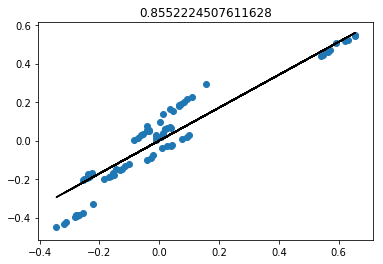

Iteration 374 | Cost: 0.003466 | theta -0.0000000000 0.85522245


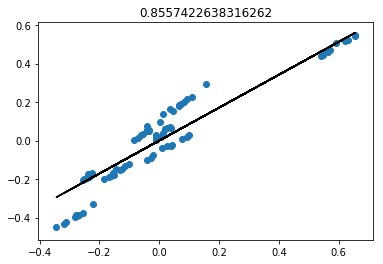

Iteration 375 | Cost: 0.003464 | theta -0.0000000000 0.85574226


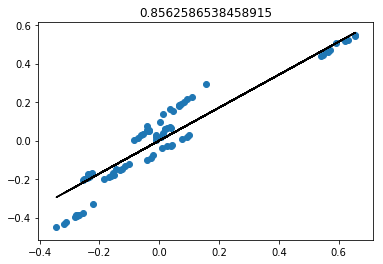

Iteration 376 | Cost: 0.003461 | theta -0.0000000000 0.85625865


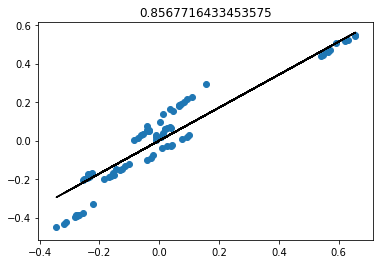

Iteration 377 | Cost: 0.003458 | theta -0.0000000000 0.85677164


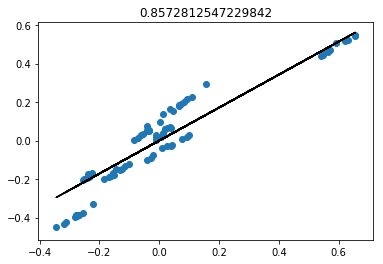

Iteration 378 | Cost: 0.003456 | theta -0.0000000000 0.85728125


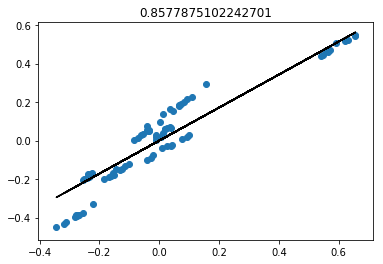

Iteration 379 | Cost: 0.003453 | theta -0.0000000000 0.85778751


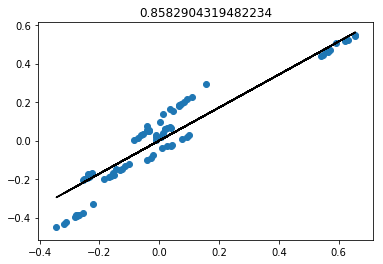

Iteration 380 | Cost: 0.003451 | theta -0.0000000000 0.85829043


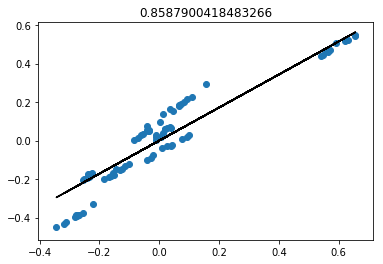

Iteration 381 | Cost: 0.003448 | theta -0.0000000000 0.85879004


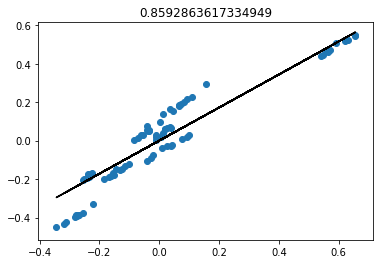

Iteration 382 | Cost: 0.003446 | theta -0.0000000000 0.85928636


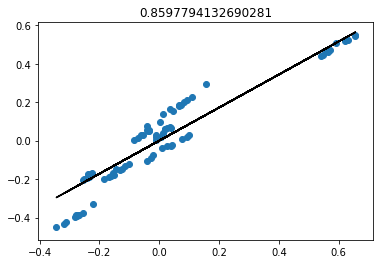

Iteration 383 | Cost: 0.003443 | theta -0.0000000000 0.85977941


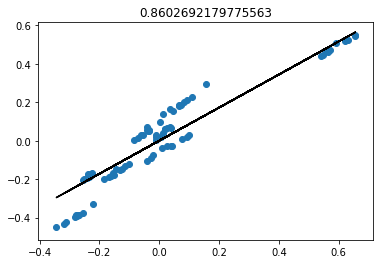

Iteration 384 | Cost: 0.003441 | theta -0.0000000000 0.86026922


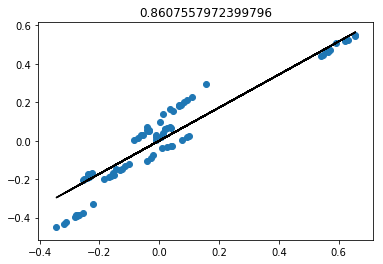

Iteration 385 | Cost: 0.003439 | theta -0.0000000000 0.86075580


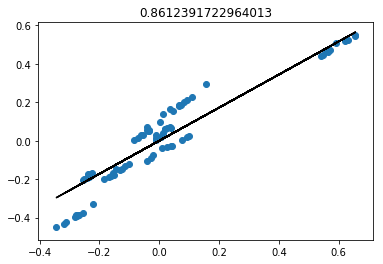

Iteration 386 | Cost: 0.003436 | theta -0.0000000000 0.86123917


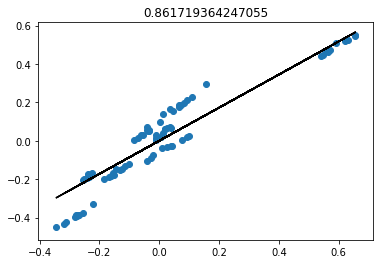

Iteration 387 | Cost: 0.003434 | theta -0.0000000000 0.86171936


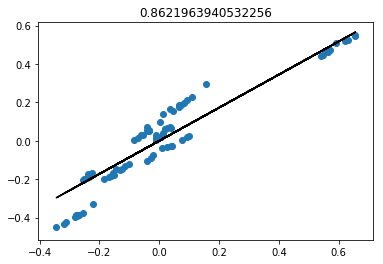

Iteration 388 | Cost: 0.003432 | theta -0.0000000000 0.86219639


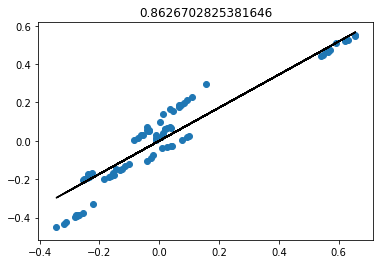

Iteration 389 | Cost: 0.003430 | theta -0.0000000000 0.86267028


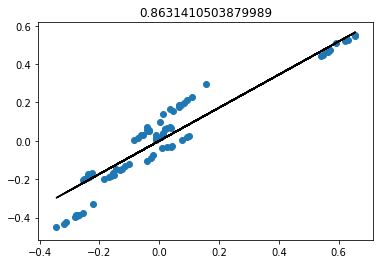

Iteration 390 | Cost: 0.003427 | theta -0.0000000000 0.86314105


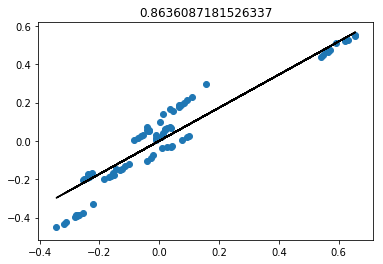

Iteration 391 | Cost: 0.003425 | theta -0.0000000000 0.86360872


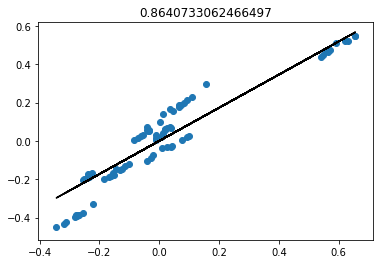

Iteration 392 | Cost: 0.003423 | theta -0.0000000000 0.86407331


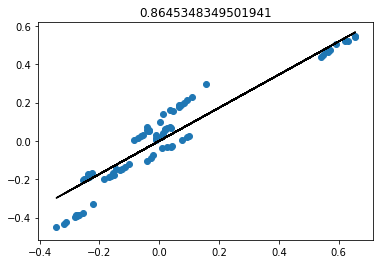

Iteration 393 | Cost: 0.003421 | theta -0.0000000000 0.86453483


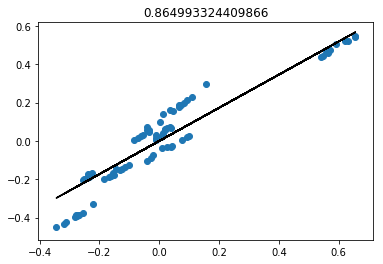

Iteration 394 | Cost: 0.003419 | theta -0.0000000000 0.86499332


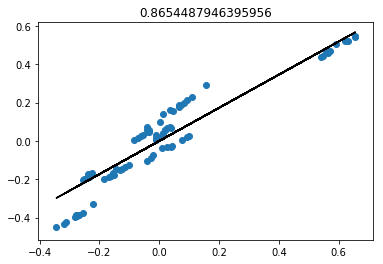

Iteration 395 | Cost: 0.003417 | theta -0.0000000000 0.86544879


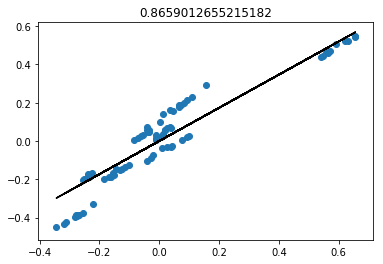

Iteration 396 | Cost: 0.003415 | theta -0.0000000000 0.86590127


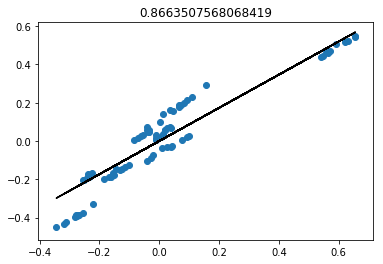

Iteration 397 | Cost: 0.003413 | theta -0.0000000000 0.86635076


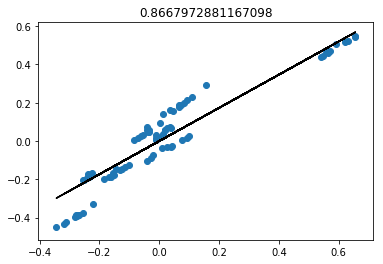

Iteration 398 | Cost: 0.003411 | theta -0.0000000000 0.86679729


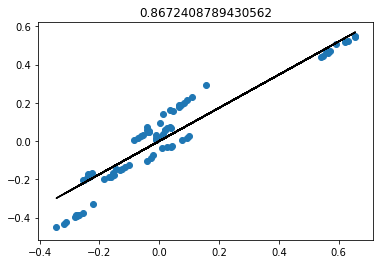

Iteration 399 | Cost: 0.003409 | theta -0.0000000000 0.86724088


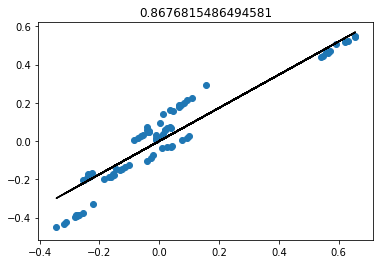

Iteration 400 | Cost: 0.003407 | theta -0.0000000000 0.86768155


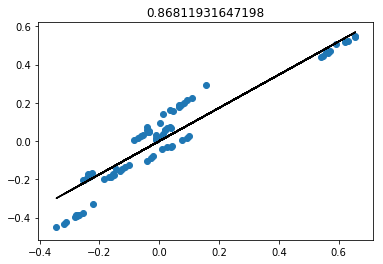

Iteration 401 | Cost: 0.003405 | theta -0.0000000000 0.86811932


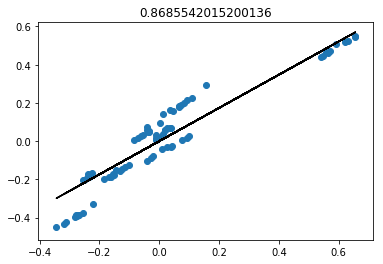

Iteration 402 | Cost: 0.003403 | theta -0.0000000000 0.86855420


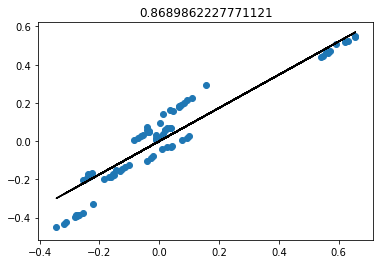

In [ ]:
print("Running...")
yIntercept = 0
slope = 0
parameters = [yIntercept, slope]
theta = gradientDescent(X, y, parameters, learning_rate, num_iterations)

# Sort the data in ascending wrt mean square error
costThetaList.sort(key=lambda x: x.cost, reverse=False)
print("After %d iterations b = %f, m = %f, error = %f" % (num_iterations, costThetaList[0].yIntercept, costThetaList[0].slope, costThetaList[0].cost))



## Verify result by comparing it from sklearn result

In [ ]:
from sklearn.linear_model import LinearRegression
lr  = LinearRegression()
lr.fit(X.values.reshape(-1, 1), y.values.ravel())

In [ ]:
lr.coef_

In [ ]:
lr.intercept_

In [ ]:
lr.score(xTest.values.reshape(-1, 1), yTest.values.ravel())

## As you can see, coeffiecien (slope) is 0.93 for both Sklearn technique and simple numpy vector technique

Square mean error = 0.003261
m or coeffiencie = 0.93
c or intercept = -8.881784197001253e-17